In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from utils import HeatMap

done


In [2]:
# Import NBA Data
xls = pd.ExcelFile('Data/NBA_Data.xlsx')

In [3]:
general = pd.read_excel(xls, 'General')
advanced = pd.read_excel(xls, 'Advanced')
defense_overall = pd.read_excel(xls, 'Overall Defensive Dashboard')
defense_3pt = pd.read_excel(xls, '3pt Defensive Dashboard')
defense_6ft = pd.read_excel(xls, '< 6ft Defensive Dashboard')
defense_10ft = pd.read_excel(xls, '< 10ft Defensive Dashboard')
defense_15ft = pd.read_excel(xls, '> 15ft Defensive Dashboard')
hustle = pd.read_excel(xls, 'Hustle')
shooting = pd.read_excel(xls, 'Shooting')
isolation = pd.read_excel(xls, 'Isolation')
pnr_handler = pd.read_excel(xls, 'PnR Ball Handler')
pnr_roll = pd.read_excel(xls, 'PnR Roll Man')
transition = pd.read_excel(xls, 'Transition')
post_up = pd.read_excel(xls, 'Post Up')
spot_up = pd.read_excel(xls, 'Spot Up')
handoff = pd.read_excel(xls, 'Handoff')
cut = pd.read_excel(xls, 'Cut')
off_screen = pd.read_excel(xls, 'Off Screen')
putback = pd.read_excel(xls, 'Putback')
passing = pd.read_excel(xls, 'Passing')

In [4]:
# No. of Features
print('No. of features in general = ', len(general.columns))
print('No. of features in advanced = ', len(advanced.columns))
print('No. of features in defense_overall = ', len(defense_overall.columns))
print('No. of features in defense_3pt = ', len(defense_3pt.columns))
print('No. of features in defense_6ft = ', len(defense_6ft.columns))
print('No. of features in defense_10ft = ', len(defense_10ft.columns))
print('No. of features in defense_15ft = ', len(defense_15ft.columns))
print('No. of features in hustle = ', len(hustle.columns))
print('No. of features in shooting = ', len(shooting.columns))
print('No. of features in isolation = ', len(isolation.columns))
print('No. of features in pnr_handler = ', len(pnr_handler.columns))
print('No. of features in pnr_roll = ', len(pnr_roll.columns))
print('No. of features in transition = ', len(transition.columns))
print('No. of features in post_up = ', len(post_up.columns))
print('No. of features in spot_up = ', len(spot_up.columns))
print('No. of features in handoff = ', len(handoff.columns))
print('No. of features in cut = ', len(cut.columns))
print('No. of features in off_screen = ', len(off_screen.columns))
print('No. of features in putback = ', len(putback.columns))
print('No. of features in passing = ', len(passing.columns))

print('\nTotal feature = ', len(general.columns) + len(advanced.columns) + len(defense_overall.columns) + len(defense_3pt.columns) + len(defense_6ft.columns) + len(defense_10ft.columns) + len(defense_15ft.columns) + len(hustle.columns)+ len(shooting.columns) + len(isolation.columns) + len(pnr_handler.columns) + len(pnr_roll.columns) + len(transition.columns) + len(post_up.columns) + len(spot_up.columns) + len(handoff.columns) + len(cut.columns) + len(off_screen.columns) + len(putback.columns) + len(passing.columns))

No. of features in general =  30
No. of features in advanced =  23
No. of features in defense_overall =  12
No. of features in defense_3pt =  12
No. of features in defense_6ft =  12
No. of features in defense_10ft =  12
No. of features in defense_15ft =  12
No. of features in hustle =  17
No. of features in shooting =  21
No. of features in isolation =  17
No. of features in pnr_handler =  17
No. of features in pnr_roll =  17
No. of features in transition =  17
No. of features in post_up =  17
No. of features in spot_up =  17
No. of features in handoff =  17
No. of features in cut =  17
No. of features in off_screen =  17
No. of features in putback =  17
No. of features in passing =  15

Total feature =  336


In [5]:
# Pre-processing DataFrame columns
general.drop('Unnamed: 0', axis = 1, inplace = True)

advanced.drop('Unnamed: 0', axis = 1, inplace = True)
advanced.rename({'TO\xa0RATIO' : 'TO RATIO'}, axis = 1, inplace = True)
advanced.rename({'AST\xa0RATIO' : 'AST RATIO'}, axis = 1, inplace = True)

def change_name_defense(df, shot_type):
    for feature in ['FREQ', 'DFGM', 'DFGA', 'DFG%', 'FG%', 'DIFF%']:
        df.rename({feature : shot_type + '_' + feature}, axis = 1, inplace = True)
change_name_defense(defense_overall, 'OVERALL')
change_name_defense(defense_3pt, '3PT')
change_name_defense(defense_6ft, '6FT')
change_name_defense(defense_10ft, '10FT')
change_name_defense(defense_15ft, '15FT')

hustle.rename({'SCREEN' : 'SCREEN ASSISTS',
               'SCREEN.1' : 'SCREEN ASSISTS PTS',
               'OFF LOOSE BALLS' : 'OFF LOOSE BALLS RECOVERED',
               'DEF LOOSE BALLS' : 'DEF LOOSE BALLS RECOVERED',
               'LOOSE BALLS' : 'LOOSE BALLS RECOVERED',
               '% LOOSE BALLS' : '% LOOSE BALLS RECOVERED OFF',
               '% LOOSE BALLS.1' : '% LOOSE BALLS RECOVERED DEF',
               'CHARGES' : 'CHARGES DRAWN',
               'CONTESTED' : 'CONTESTED 2PT SHOTS',
               'CONTESTED.1' : 'CONTESTED 3PT SHOTS',
               'CONTESTED.2' : 'CONTESTED SHOTS'}, axis = 1, inplace = True)
hustle.drop(0, inplace = True)
hustle.replace('-', 0, inplace = True)
hustle[['SCREEN ASSISTS', 'SCREEN ASSISTS PTS', 'DEFLECTIONS', 'OFF LOOSE BALLS RECOVERED', 'DEF LOOSE BALLS RECOVERED',
        'LOOSE BALLS RECOVERED', '% LOOSE BALLS RECOVERED OFF', '% LOOSE BALLS RECOVERED DEF', 'CHARGES DRAWN', 'CONTESTED 2PT SHOTS',
        'CONTESTED 3PT SHOTS', 'CONTESTED SHOTS']] = hustle[['SCREEN ASSISTS', 'SCREEN ASSISTS PTS', 'DEFLECTIONS', 'OFF LOOSE BALLS RECOVERED', 'DEF LOOSE BALLS RECOVERED', 'LOOSE BALLS RECOVERED', '% LOOSE BALLS RECOVERED OFF', '% LOOSE BALLS RECOVERED DEF', 'CHARGES DRAWN', 'CONTESTED 2PT SHOTS', 'CONTESTED 3PT SHOTS', 'CONTESTED SHOTS']].astype('float')

shooting.reset_index(inplace = True)
shooting.rename({'Unnamed: 0' : 'PLAYER',
                 'Unnamed: 1' : 'TEAM',   
                 'Unnamed: 2' : 'AGE',
                 'LESS\xa0THAN\xa05FT.' : 'FGM_<5',
                 'Unnamed: 4' : 'FGA_<5',
                 'Unnamed: 5' : 'FG%_<5',
                 '5-9\xa0FT.' : 'FGM_5-9',
                 'Unnamed: 7' : 'FGA_5-9',
                 'Unnamed: 8' : 'FG%_5-9',
                 '10-14\xa0FT.' : 'FGM_10-14',
                 'Unnamed: 10' : 'FGA_10-14',
                 'Unnamed: 11' : 'FG%_10-14',
                 '15-19\xa0FT.' : 'FGM_15-19',
                 'Unnamed: 13' : 'FGA_15-19',
                 'Unnamed: 14' : 'FG%_15-19',
                 '20-24\xa0FT.' : 'FGM_20-24',
                 'Unnamed: 16' : 'FGA_20-24',
                 'Unnamed: 17' : 'FG%_20-24',
                 '25-29\xa0FT.' : 'FGM_25-29',
                 'Unnamed: 19' : 'FGA_25-29',
                 'Unnamed: 20' : 'FG%_25-29'}, axis = 1, inplace = True)
shooting.fillna(0, inplace = True)
shooting.drop(0, inplace = True)
shooting.replace('-', 0, inplace = True)
shooting[['FGM_<5', 'FGA_<5', 'FG%_<5', 'FGM_5-9', 'FGA_5-9', 'FG%_5-9', 'FGM_10-14', 'FGA_10-14', 'FG%_10-14', 'FGM_15-19', 'FGA_15-19', 'FG%_15-19', 'FGM_20-24', 'FGA_20-24', 'FG%_20-24', 'FGM_25-29', 'FGA_25-29', 'FG%_25-29']] = shooting[['FGM_<5', 'FGA_<5', 'FG%_<5', 'FGM_5-9', 'FGA_5-9', 'FG%_5-9', 'FGM_10-14', 'FGA_10-14', 'FG%_10-14', 'FGM_15-19', 'FGA_15-19',  'FG%_15-19', 'FGM_20-24', 'FGA_20-24', 'FG%_20-24', 'FGM_25-29', 'FGA_25-29', 'FG%_25-29']].astype('float')

def change_name_poss(df, poss_type):
    for feature in ['FT', 'TOV', 'SF', 'AND\xa0ONE', 'SCORE']:
        df.rename({feature : poss_type + '_' + feature + '_FREQ'}, axis = 1, inplace = True)
    for feature in ['POSS', 'FREQ', 'PPP', 'PTS', 'FGM', 'FGA', 'FG%', 'EFG%', 'PERCENTILE']:
        df.rename({feature : poss_type + '_' + feature}, axis = 1, inplace = True)
    df.drop(0, inplace = True)
change_name_poss(isolation, 'ISOLATION')
change_name_poss(pnr_handler, 'PNR_HANDLER')
change_name_poss(pnr_roll, 'PNR_ROLL')
change_name_poss(transition, 'TRANSITION')
change_name_poss(post_up, 'POST_UP')
change_name_poss(spot_up, 'SPOT_UP')
change_name_poss(handoff, 'HANDOFF')
change_name_poss(cut, 'CUT')
change_name_poss(off_screen, 'OFF_SCREEN')
change_name_poss(putback, 'PUTBACK')

passing.rename({'PASSES' : 'PASSES MADE',
                'PASSES.1' : 'PASSES RECEIVED',
                'SECONDARY' : 'SECONDARY AST',
                'POTENTIAL' : 'POTENTIAL AST',
                'AST\xa0PTS' : 'AST PTS CREATED',
                'AST.1' : 'AST ADJ',
                'AST\xa0TO' : 'AST TO PASS%',
                'AST\xa0TO.1' : 'AST TO PASS% ADJ'}, axis = 1, inplace = True)
passing.drop(0, inplace = True)
passing.replace('-', 0, inplace = True)
passing[['PASSES MADE', 'PASSES RECEIVED', 'AST', 'SECONDARY AST', 'POTENTIAL AST',
         'AST PTS CREATED', 'AST ADJ', 'AST TO PASS%', 'AST TO PASS% ADJ']] = passing[['PASSES MADE', 'PASSES RECEIVED', 'AST', 'SECONDARY AST', 'POTENTIAL AST',
                                                                                       'AST PTS CREATED', 'AST ADJ', 'AST TO PASS%', 'AST TO PASS% ADJ']].astype('float')                                                                                       

# Feature Selection/Dimension Reduction:
There are a total of 336 features. Feature Selection is conducted by dropping features with high correlation and Variance Inflation Factor.

# General

In [6]:
print(general.shape)
general.head()

(530, 29)


PLAYER TEAM  AGE  GP   W   L   MIN   PTS   FGM   FGA   FG%  \
0           James Harden  HOU   29  78  51  27  36.8  36.1  10.8  24.5  44.2   
1            Paul George  OKC   29  77  46  31  36.9  28.0   9.2  21.0  43.8   
2  Giannis Antetokounmpo  MIL   24  72  56  16  32.8  27.7  10.0  17.3  57.8   
3            Joel Embiid  PHI   25  64  43  21  33.7  27.5   9.1  18.7  48.4   
4           LeBron James  LAL   34  55  28  27  35.2  27.4  10.1  19.9  51.0   

   3PM   3PA   3P%  FTM   FTA   FT%  OREB  DREB   REB  AST  TOV  STL  BLK  \
0  4.8  13.2  36.8  9.7  11.0  87.9   0.8   5.8   6.6  7.5  5.0  2.0  0.7   
1  3.8   9.8  38.6  5.9   7.0  83.9   1.4   6.8   8.2  4.1  2.7  2.2  0.4   
2  0.7   2.8  25.6  6.9   9.5  72.9   2.2  10.3  12.5  5.9  3.7  1.3  1.5   
3  1.2   4.1  30.0  8.2  10.1  80.4   2.5  11.1  13.6  3.7  3.5  0.7  1.9   
4  2.0   5.9  33.9  5.1   7.6  66.5   1.0   7.4   8.5  8.3  3.6  1.3  0.6   

    PF    FP  DD2  TD3  +/-  
0  3.1  58.7   34    7  4.6  
1  2.8  49.3   24    1  6.4  
2  3.2  56.2   54    5  9.1  
3  3.3  53.7   58    2  5.8  
4  1.7  52.0   32    8  2.1

In [7]:
#Drop Players who play less than 12 mins/game and 10 games
general = general[(general['MIN'] >= 12) & (general['GP'] >= 10)]
general.reset_index(drop = True, inplace = True)
general.shape

(388, 29)

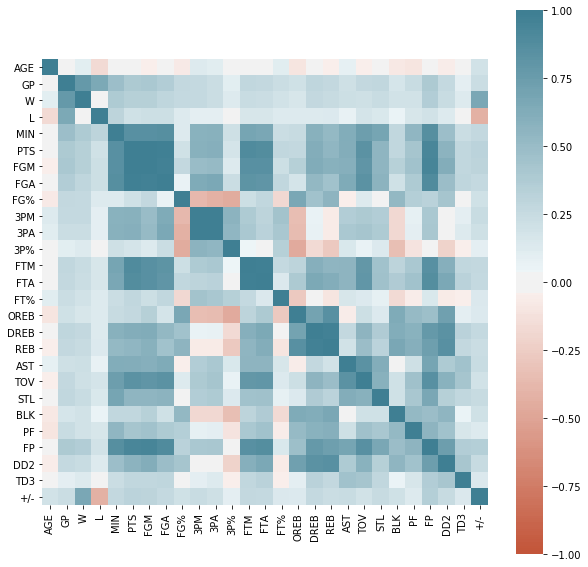

In [8]:
HeatMap(general, -1, 1)

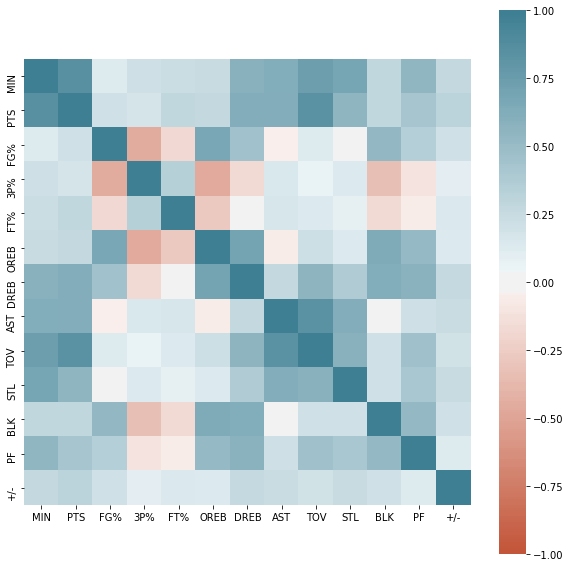

In [9]:
general.drop(['GP', 'W', 'L', 'FGA', 'FGM', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'FP', 'DD2', 'TD3'], axis = 1, inplace = True)
HeatMap(general.drop('AGE', axis = 1), -1, 1)

In [10]:
X = general.drop(['PLAYER', 'TEAM', 'AGE', 'TOV', 'PF', 'FT%'], axis = 1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

MIN     59.085091
PTS     17.386166
FG%     22.549634
3P%     13.447371
OREB     8.696516
DREB    15.918558
AST      6.423177
STL     10.316391
BLK      4.706850
+/-      1.143264
dtype: float64

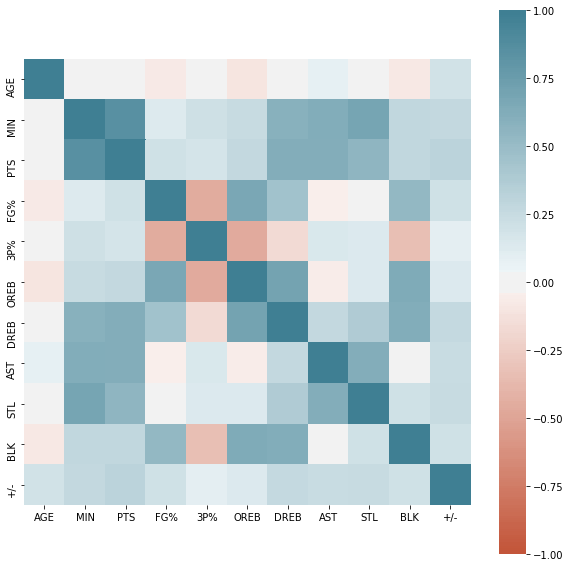

In [11]:
general.drop(['PF', 'TOV', 'FT%'], axis = 1, inplace = True)
HeatMap(general, -1, 1)

In [12]:
general.head()

PLAYER TEAM  AGE   MIN   PTS   FG%   3P%  OREB  DREB  AST  \
0           James Harden  HOU   29  36.8  36.1  44.2  36.8   0.8   5.8  7.5   
1            Paul George  OKC   29  36.9  28.0  43.8  38.6   1.4   6.8  4.1   
2  Giannis Antetokounmpo  MIL   24  32.8  27.7  57.8  25.6   2.2  10.3  5.9   
3            Joel Embiid  PHI   25  33.7  27.5  48.4  30.0   2.5  11.1  3.7   
4           LeBron James  LAL   34  35.2  27.4  51.0  33.9   1.0   7.4  8.3   

   STL  BLK  +/-  
0  2.0  0.7  4.6  
1  2.2  0.4  6.4  
2  1.3  1.5  9.1  
3  0.7  1.9  5.8  
4  1.3  0.6  2.1

# Advanced

In [13]:
print(advanced.shape)
advanced.head()

(530, 22)


PLAYER TEAM  AGE  GP   W   L   MIN  OFFRTG  DEFRTG  NETRTG  AST%  \
0    Bam Adebayo  MIA   21  82  39  43  23.3   105.0   104.5     0.5  14.6   
1   Bradley Beal  WAS   26  82  32  50  36.9   111.6   113.5    -1.8  23.3   
2    Bryn Forbes  SAS   25  82  48  34  28.0   109.9   110.2    -0.3  10.5   
3    Buddy Hield  SAC   26  82  39  43  31.9   109.4   110.0    -0.6  11.7   
4  Collin Sexton  CLE   20  82  19  63  31.8   105.6   118.1   -12.5  15.4   

   AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  EFG%   TS%  USG%    PACE  \
0    1.52       20.7    8.3   22.1  15.1      13.6  57.9  62.3  15.7   99.50   
1    2.00       18.2    2.8   10.4   6.6       9.1  54.0  58.1  27.7  102.80   
2    2.19       16.3    0.8    9.6   5.3       7.5  56.8  58.6  17.1   99.21   
3    1.40       11.5    3.6   11.0   7.2       8.2  56.0  58.7  24.3  104.94   
4    1.31       13.9    2.1    7.2   4.5      10.6  48.0  52.0  24.7   98.54   

    PIE  
0  13.3  
1  12.8  
2   7.7  
3  11.0  
4   7.3

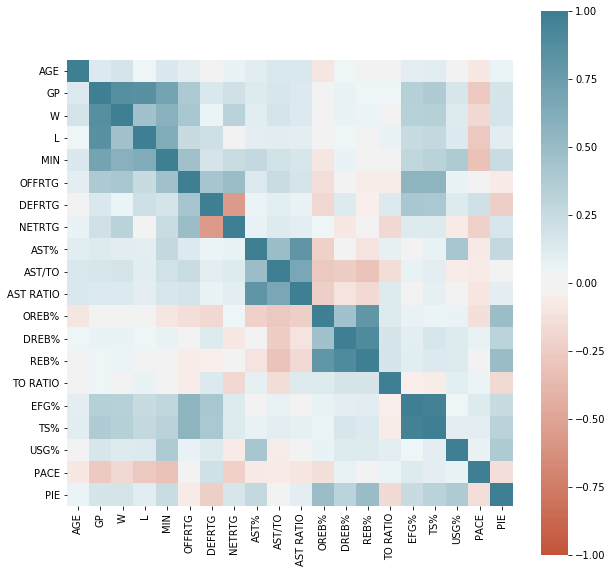

In [14]:
# Drop features with very high correlation
HeatMap(advanced, -1, 1)

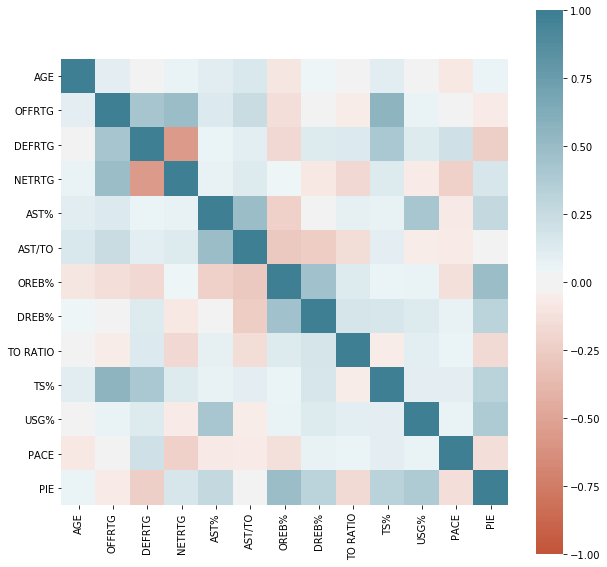

In [15]:
advanced.drop(['GP', 'W', 'L', 'MIN', 'AST RATIO', 'REB%', 'EFG%'], axis = 1, inplace = True)
HeatMap(advanced, -1, 1)

In [16]:
X = advanced.drop(['PLAYER', 'TEAM', 'NETRTG', 'PACE', 'OFFRTG', 'DEFRTG', 'AGE'], axis = 1)
pd.Series([variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])], index=X.columns)

AST%         6.8
AST/TO       5.5
OREB%        4.3
DREB%        7.0
TO RATIO     7.3
TS%         15.9
USG%        14.0
PIE          7.0
dtype: float64

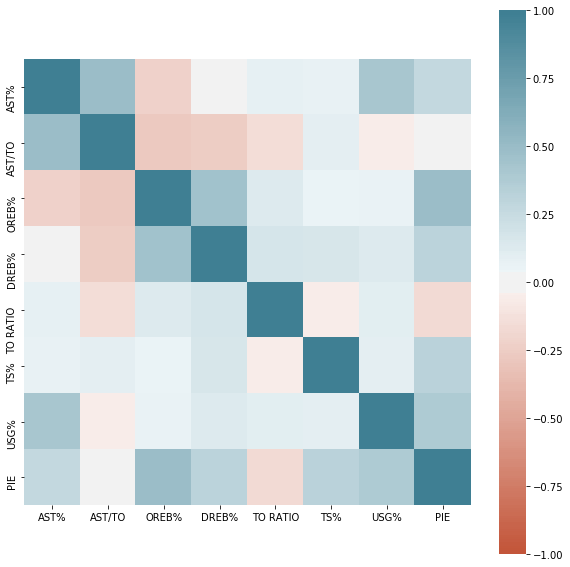

In [17]:
advanced.drop(['NETRTG', 'PACE', 'OFFRTG', 'DEFRTG', 'AGE'], axis = 1, inplace = True)
HeatMap(advanced, -1, 1)

In [18]:
advanced.head()

PLAYER TEAM  AST%  AST/TO  OREB%  DREB%  TO RATIO   TS%  USG%   PIE
0    Bam Adebayo  MIA  14.6    1.52    8.3   22.1      13.6  62.3  15.7  13.3
1   Bradley Beal  WAS  23.3    2.00    2.8   10.4       9.1  58.1  27.7  12.8
2    Bryn Forbes  SAS  10.5    2.19    0.8    9.6       7.5  58.6  17.1   7.7
3    Buddy Hield  SAC  11.7    1.40    3.6   11.0       8.2  58.7  24.3  11.0
4  Collin Sexton  CLE  15.4    1.31    2.1    7.2      10.6  52.0  24.7   7.3

# Defense

In [19]:
defense_overall.drop(['G', 'GP'], axis = 1, inplace = True)
defense_3pt.drop(['G', 'GP'], axis = 1, inplace = True)
defense_6ft.drop(['G', 'GP'], axis = 1, inplace = True)
defense_10ft.drop(['G', 'GP'], axis = 1, inplace = True)
defense_15ft.drop(['G', 'GP'], axis = 1, inplace = True)

In [20]:
defense = defense_overall.merge(defense_3pt, how = 'left')
defense = defense.merge(defense_6ft, how = 'left')
defense = defense.merge(defense_10ft, how = 'left')
defense = defense.merge(defense_15ft, how = 'left')
defense.fillna(0, inplace = True)
print(defense.shape)
defense.head()

(524, 34)


PLAYER TEAM  AGE POSITION  OVERALL_FREQ  OVERALL_DFGM  OVERALL_DFGA  \
0   Joel Embiid  PHI   25      F-C             1           8.4          18.6   
1   Rudy Gobert  UTA   27        C             1           8.0          17.8   
2  Clint Capela  HOU   25        C             1           8.3          17.7   
3  Steven Adams  OKC   25        C             1           7.8          16.4   
4   Brook Lopez  MIL   31        C             1           7.3          16.2   

   OVERALL_DFG%  OVERALL_FG%  OVERALL_DIFF%  3PT_FREQ  3PT_DFGM  3PT_DFGA  \
0          45.0         48.1           -3.1     0.205       1.4       3.8   
1          45.0         48.9           -3.9     0.147       0.9       2.6   
2          46.7         47.2           -0.4     0.242       1.4       4.3   
3          47.6         48.4           -0.9     0.230       1.3       3.8   
4          44.9         48.8           -3.9     0.246       1.5       4.0   

   3PT_DFG%  3PT_FG%  3PT_DIFF%  6FT_FREQ  6FT_DFGM  6FT_DFGA  6FT_DFG%  \
0      37.5     34.6        2.9     0.495       4.8       9.2      52.2   
1      35.9     34.4        1.5     0.488       4.5       8.7      51.6   
2      33.3     35.0       -1.7     0.434       4.5       7.7      58.1   
3      33.9     35.2       -1.3     0.443       4.2       7.3      57.4   
4      38.7     34.3        4.4     0.399       3.3       6.5      50.9   

   6FT_FG%  6FT_DIFF%  10FT_FREQ  10FT_DFGM  10FT_DFGA  10FT_DFG%  10FT_FG%  \
0     61.6       -9.4      0.597        5.4       11.1       48.8      56.9   
1     62.6      -11.0      0.633        5.5       11.3       48.9      57.7   
2     62.4       -4.2      0.566        5.5       10.0       54.5      57.3   
3     62.1       -4.7      0.569        5.1        9.3       55.0      57.4   
4     62.3      -11.5      0.540        4.2        8.7       47.9      57.3   

   10FT_DIFF%  15FT_FREQ  15FT_DFGM  15FT_DFGA  15FT_DFG%  15FT_FG%  \
0        -8.1      0.325        2.3        6.1       38.3      36.0   
1        -8.8      0.266        1.9        4.8       39.2      36.3   
2        -2.8      0.359        2.2        6.4       35.0      36.7   
3        -2.4      0.353        2.1        5.8       36.1      36.9   
4        -9.5      0.365        2.4        5.9       40.8      36.1   

   15FT_DIFF%  
0         2.3  
1         2.9  
2        -1.7  
3        -0.8  
4         4.7

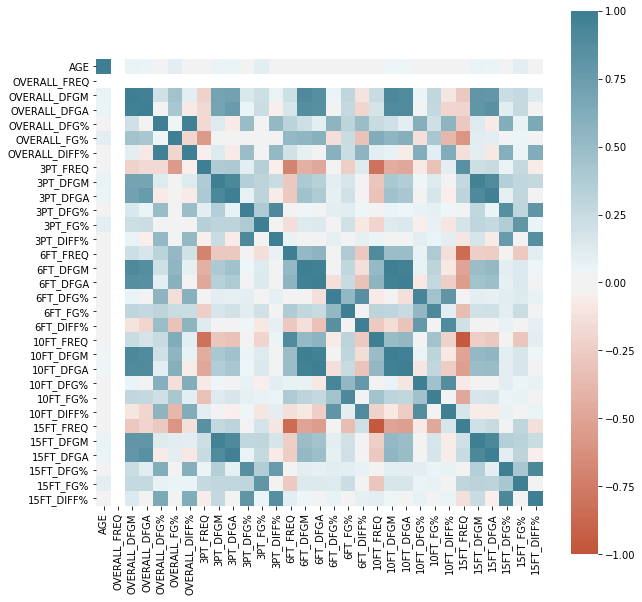

In [21]:
# Drop features with very high correlation
HeatMap(defense, -1, 1)

In [22]:
defense['6-9_DFGM'] = defense['10FT_DFGM'] - defense['6FT_DFGM']
defense['6-9_DFGA'] = defense['10FT_DFGA'] - defense['6FT_DFGA']
defense['6-9_DFG%'] = (defense['6-9_DFGM']/defense['6-9_DFGA']).round(3)*100
defense['6-9_FG%'] = defense['10FT_FG%']*2 - defense['6FT_FG%']
defense['6-9_DIFF%'] = defense['6-9_DFG%'] - defense['6-9_FG%']
defense['6-9_FREQ'] = (defense['6-9_DFGA']/defense['OVERALL_DFGA']*100).round(1)

In [23]:
defense['10-15_DFGM'] = (defense['OVERALL_DFGM'] - defense['10FT_DFGM'] - defense['15FT_DFGM']).round(1)
defense['10-15_DFGA'] = defense['OVERALL_DFGA'] - defense['10FT_DFGA'] - defense['15FT_DFGA']
defense['10-15_DFG%'] = (defense['10-15_DFGM']/defense['10-15_DFGA']).round(3)*100
defense['10-15_FG%'] = defense['OVERALL_FG%']*3 - defense['10FT_FG%'] - defense['15FT_FG%']
defense['10-15_DIFF%'] = (defense['10-15_DFG%'] - defense['10-15_FG%']).round(1)
defense['10-15_FREQ'] = (defense['10-15_DFGA']/defense['OVERALL_DFGA']*100).round(1)

In [24]:
defense['16-3PT_DFGM'] = defense['15FT_DFGM'] - defense['3PT_DFGM']
defense['16-3PT_DFGA'] = defense['15FT_DFGA'] - defense['3PT_DFGA']
defense['16-3PT_DFG%'] = (defense['16-3PT_DFGM']/defense['16-3PT_DFGA']).round(3)*100
defense['16-3PT_FG%'] = defense['15FT_FG%']*2 - defense['3PT_FG%']
defense['16-3PT_DIFF%'] = defense['16-3PT_DFG%'] - defense['16-3PT_FG%']
defense['16-3PT_FREQ'] = (defense['16-3PT_DFGA']/defense['OVERALL_DFGA']*100).round(1)

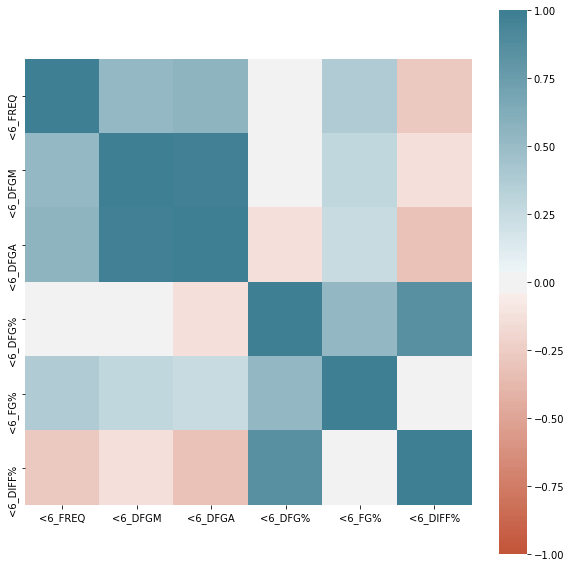

In [25]:
defense.rename({'6FT_FREQ' : '<6_FREQ', '6FT_DFGM' : '<6_DFGM', '6FT_DFGA' : '<6_DFGA', '6FT_DFG%' : '<6_DFG%', '6FT_FG%' : '<6_FG%', '6FT_DIFF%' : '<6_DIFF%'}, axis = 1, inplace = True)
defense['<6_FREQ'] = defense['<6_FREQ']*100
HeatMap(defense[['<6_FREQ', '<6_DFGM', '<6_DFGA', '<6_DFG%', '<6_FG%', '<6_DIFF%']], -1, 1)

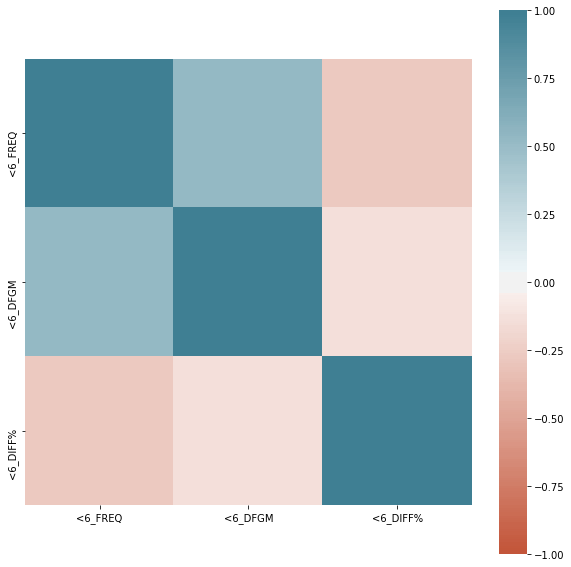

In [26]:
HeatMap(defense[['<6_FREQ', '<6_DFGM', '<6_DIFF%']], -1, 1)

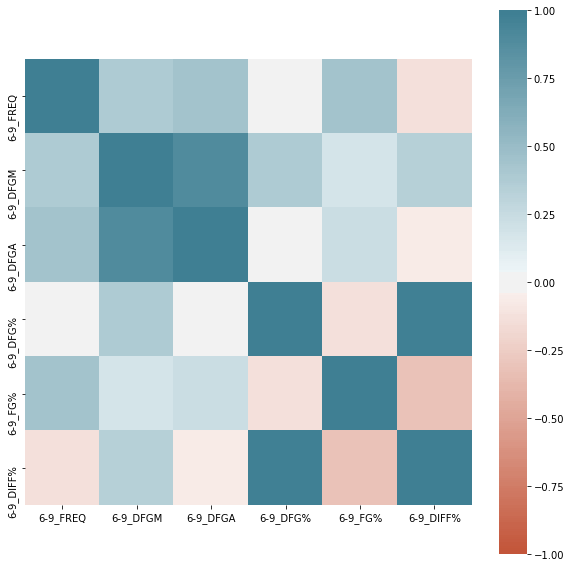

In [27]:
HeatMap(defense[['6-9_FREQ', '6-9_DFGM', '6-9_DFGA', '6-9_DFG%', '6-9_FG%', '6-9_DIFF%']], -1, 1)

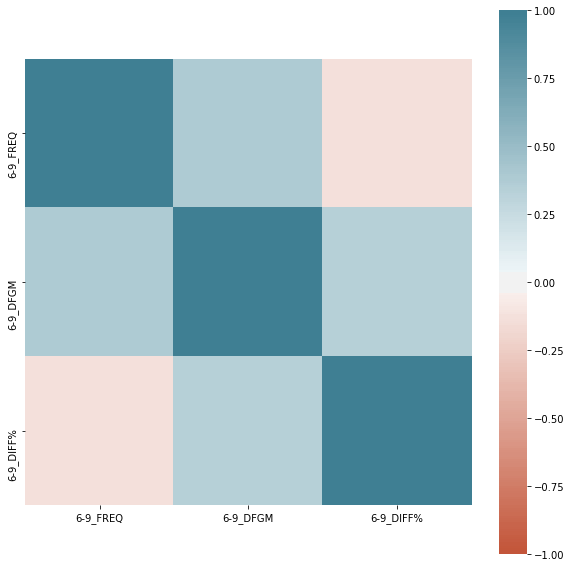

In [28]:
HeatMap(defense[['6-9_FREQ', '6-9_DFGM', '6-9_DIFF%']], -1, 1)

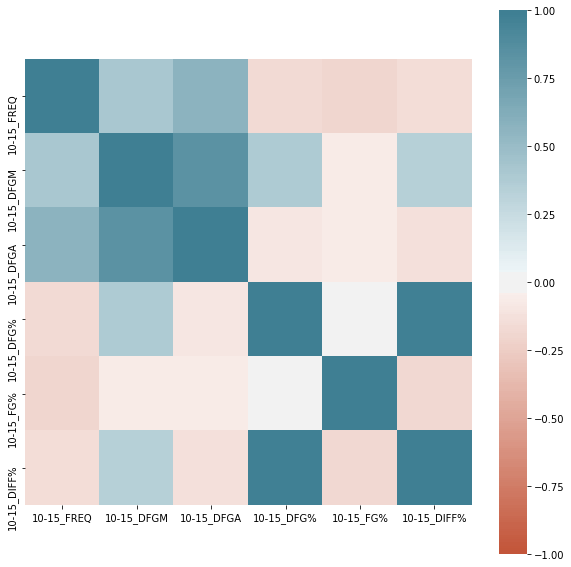

In [29]:
HeatMap(defense[['10-15_FREQ', '10-15_DFGM', '10-15_DFGA', '10-15_DFG%', '10-15_FG%', '10-15_DIFF%']], -1, 1)

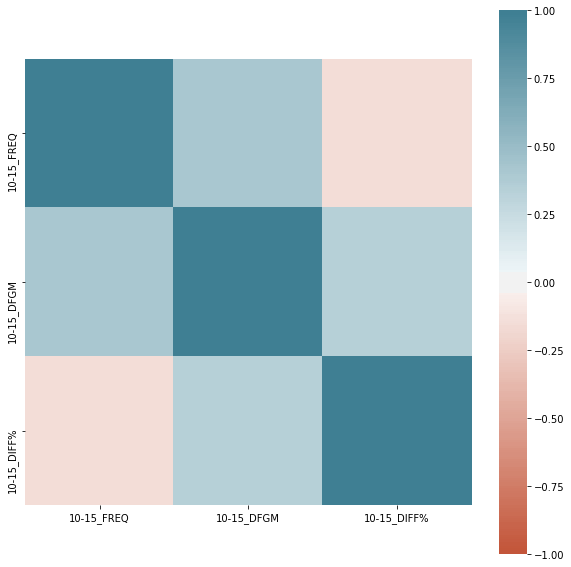

In [30]:
HeatMap(defense[['10-15_FREQ', '10-15_DFGM', '10-15_DIFF%']], -1, 1)

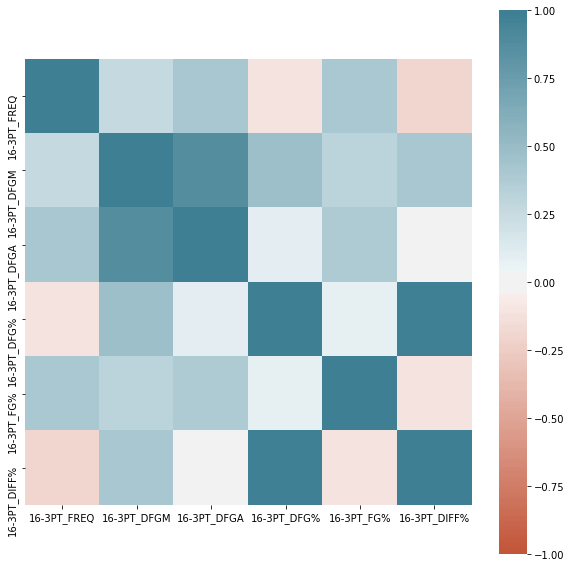

In [31]:
HeatMap(defense[['16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DFGA', '16-3PT_DFG%', '16-3PT_FG%', '16-3PT_DIFF%']], -1, 1)

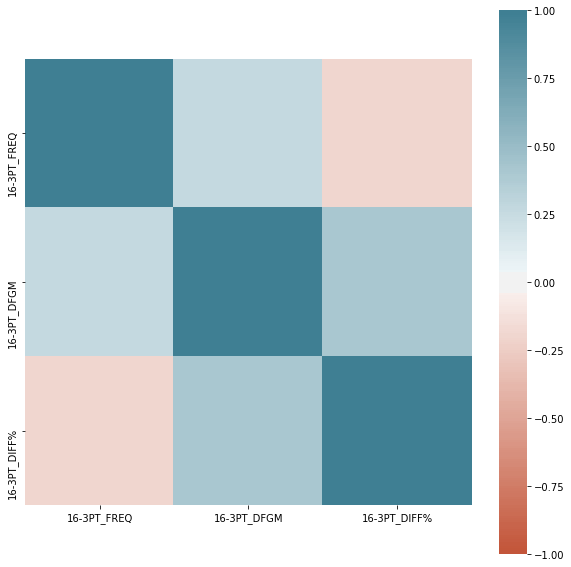

In [32]:
HeatMap(defense[['16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DIFF%']], -1, 1)

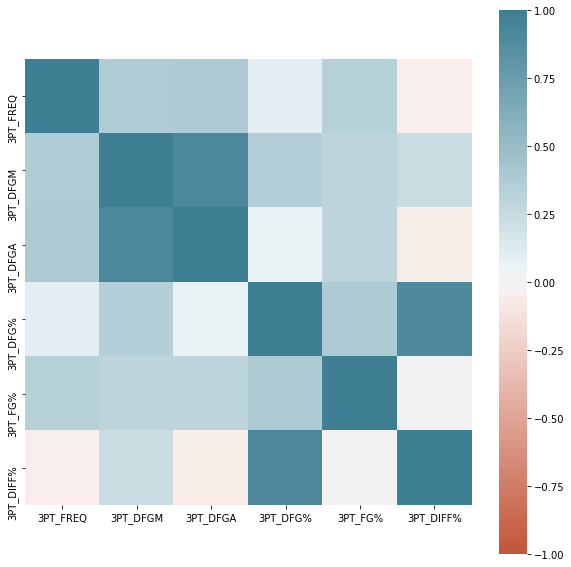

In [33]:
defense['3PT_FREQ'] = defense['3PT_FREQ']*100
HeatMap(defense[['3PT_FREQ', '3PT_DFGM', '3PT_DFGA', '3PT_DFG%', '3PT_FG%', '3PT_DIFF%']], -1, 1)

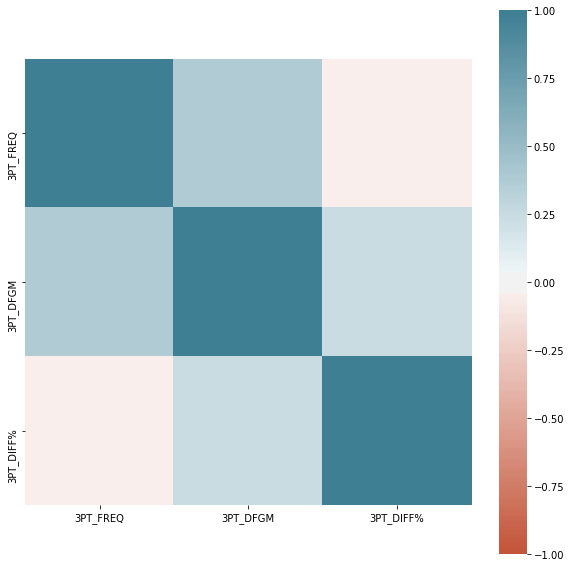

In [34]:
HeatMap(defense[['3PT_FREQ', '3PT_DFGM', '3PT_DIFF%']], -1, 1)

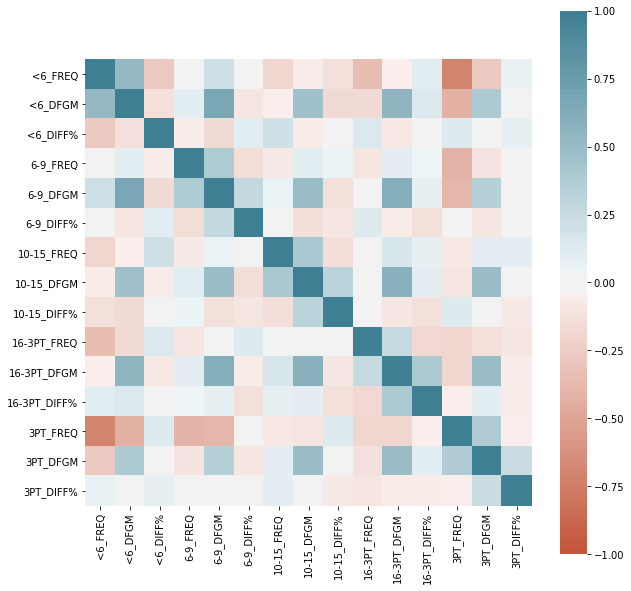

In [35]:
defense = defense[['PLAYER', 'TEAM', 'POSITION', '<6_FREQ', '<6_DFGM', '<6_DIFF%', '6-9_FREQ', '6-9_DFGM', '6-9_DIFF%', '10-15_FREQ', '10-15_DFGM', '10-15_DIFF%',
                   '16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DIFF%', '3PT_FREQ', '3PT_DFGM', '3PT_DIFF%']].copy()
defense.fillna(0, inplace = True)
defense.replace(-np.inf, 0, inplace = True)
HeatMap(defense, -1, 1)

In [36]:
defense.head()

PLAYER TEAM POSITION  <6_FREQ  <6_DFGM  <6_DIFF%  6-9_FREQ  6-9_DFGM  \
0   Joel Embiid  PHI      F-C     49.5      4.8      -9.4      10.2       0.6   
1   Rudy Gobert  UTA        C     48.8      4.5     -11.0      14.6       1.0   
2  Clint Capela  HOU        C     43.4      4.5      -4.2      13.0       1.0   
3  Steven Adams  OKC        C     44.3      4.2      -4.7      12.2       0.9   
4   Brook Lopez  MIL        C     39.9      3.3     -11.5      13.6       0.9   

   6-9_DIFF%  10-15_FREQ  10-15_DFGM  10-15_DIFF%  16-3PT_FREQ  16-3PT_DFGM  \
0      -20.6         7.5         0.7         -1.4         12.4          0.9   
1      -14.3         9.6         0.6        -17.4         12.4          1.0   
2       -8.7         7.3         0.6         -1.4         11.9          0.8   
3       -7.7         7.9         0.6         -4.7         12.2          0.8   
4      -11.4         9.9         0.7         -9.2         11.7          0.9   

   16-3PT_DIFF%  3PT_FREQ  3PT_DFGM  3PT_DIFF%  
0           1.7      20.5       1.4        2.9  
1           7.3      14.7       0.9        1.5  
2          -0.3      24.2       1.4       -1.7  
3           1.4      23.0       1.3       -1.3  
4           9.5      24.6       1.5        4.4

# Hustle

In [37]:
print(hustle.shape)
hustle.head()

(530, 17)


PLAYER TEAM   AGE    GP   MIN  SCREEN ASSISTS  SCREEN ASSISTS PTS  \
1     Aaron Gordon  ORL  23.0  78.0  33.8             0.9                 2.1   
2    Aaron Holiday  IND  22.0  50.0  12.9             0.0                 0.0   
3      Abdel Nader  OKC  25.0  61.0  11.4             0.0                 0.1   
4       Al Horford  BOS  33.0  68.0  29.0             3.3                 7.7   
5  Al-Farouq Aminu  POR  28.0  81.0  28.3             1.0                 2.3   

   DEFLECTIONS  OFF LOOSE BALLS RECOVERED  DEF LOOSE BALLS RECOVERED  \
1          1.3                        0.6                        0.6   
2          0.7                        0.2                        0.2   
3          0.5                        0.2                        0.2   
4          1.4                        0.3                        0.6   
5          1.9                        0.5                        0.5   

   LOOSE BALLS RECOVERED  % LOOSE BALLS RECOVERED OFF  \
1                    1.2                         50.5   
2                    0.3                         47.1   
3                    0.4                         52.0   
4                    0.8                         31.6   
5                    1.0                         53.8   

   % LOOSE BALLS RECOVERED DEF  CHARGES DRAWN  CONTESTED 2PT SHOTS  \
1                         49.5           0.01                  4.4   
2                         52.9           0.00                  1.5   
3                         48.0           0.02                  2.1   
4                         68.4           0.00                  8.8   
5                         46.3           0.02                  4.4   

   CONTESTED 3PT SHOTS  CONTESTED SHOTS  
1                  2.1              6.5  
2                  1.0              2.5  
3                  1.6              3.8  
4                  2.9             11.7  
5                  3.0              7.4

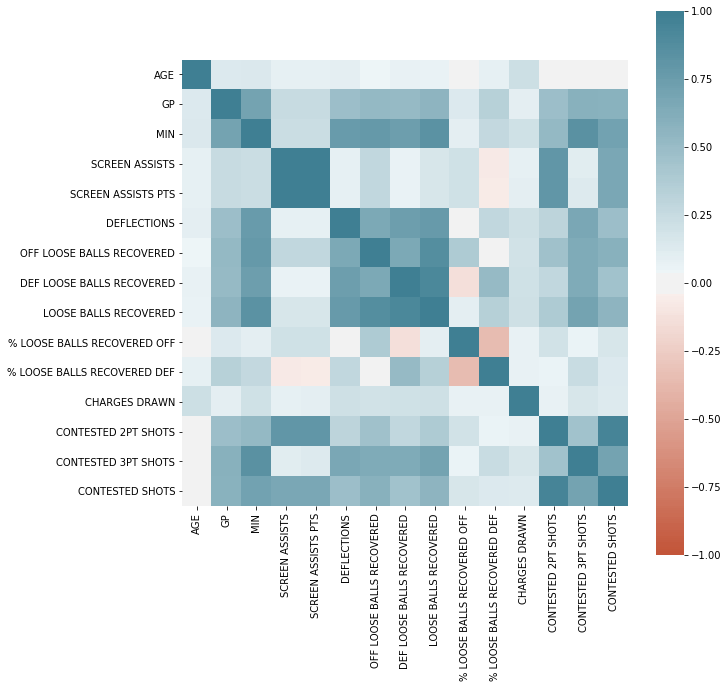

In [39]:
HeatMap(hustle, -1, 1)

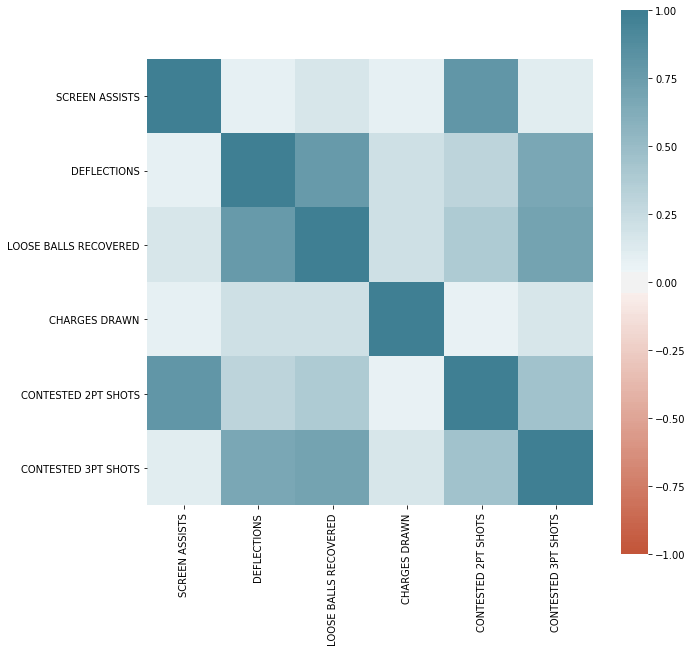

In [40]:
hustle.drop(['AGE', 'GP', 'MIN', 'SCREEN ASSISTS PTS', 'OFF LOOSE BALLS RECOVERED', 'DEF LOOSE BALLS RECOVERED', '% LOOSE BALLS RECOVERED OFF', '% LOOSE BALLS RECOVERED DEF', 'CONTESTED SHOTS'], axis = 1, inplace = True)
HeatMap(hustle, -1, 1)

# Shooting

In [41]:
print(shooting.shape)
shooting.head()

(530, 22)


index           PLAYER TEAM  AGE  FGM_<5  FGA_<5  FG%_<5  FGM_5-9  FGA_5-9  \
1      1     Aaron Gordon  ORL   23     3.2     5.2    60.9      0.3      1.0   
2      2    Aaron Holiday  IND   22     0.6     1.1    58.2      0.2      0.5   
3      3      Abdel Nader  OKC   25     0.8     1.4    56.5      0.2      0.4   
4      4       Al Horford  BOS   33     2.3     3.4    68.8      0.8      1.4   
5      5  Al-Farouq Aminu  POR   28     1.7     2.9    59.6      0.2      0.4   

   FG%_5-9  FGM_10-14  FGA_10-14  FG%_10-14  FGM_15-19  FGA_15-19  FG%_15-19  \
1     34.7        0.5        1.3       38.4        0.4        1.3       29.6   
2     31.8        0.1        0.4       31.3        0.3        0.7       41.2   
3     39.1        0.0        0.1        0.0        0.0        0.0        0.0   
4     55.3        0.5        1.0       49.3        0.8        1.4       55.8   
5     37.1        0.0        0.2       13.3        0.0        0.2       22.2   

   FGM_20-24  FGA_20-24  FG%_20-24  FGM_25-29  FGA_25-29  FG%_25-29  
1        0.8        2.0       40.4        0.9        2.7       32.7  
2        0.3        0.7       40.6        0.7        2.0       34.7  
3        0.3        0.9       36.4        0.3        0.8       30.4  
4        0.4        1.3       35.3        0.9        2.1       39.7  
5        0.7        2.0       36.6        0.5        1.6       30.2

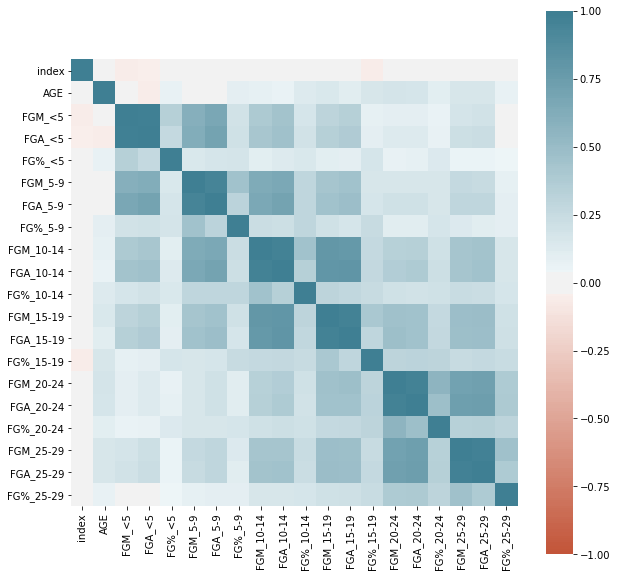

In [42]:
HeatMap(shooting, -1, 1)

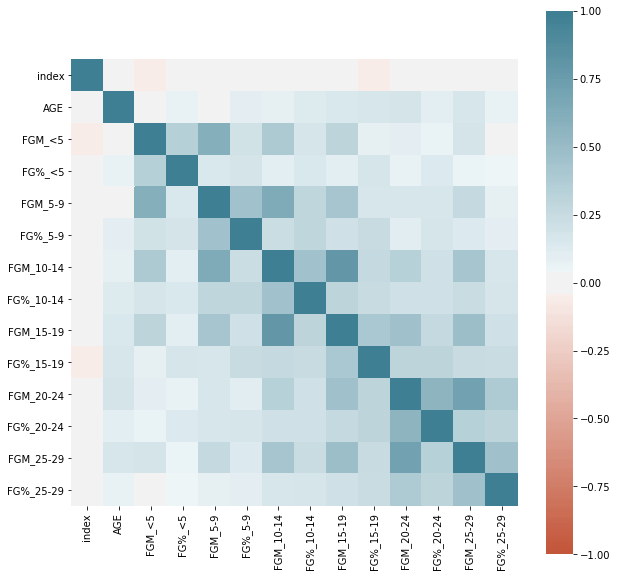

In [43]:
shooting.drop(['FGA_<5', 'FGA_5-9', 'FGA_10-14', 'FGA_15-19', 'FGA_20-24', 'FGA_25-29'], axis = 1, inplace = True)
HeatMap(shooting, -1, 1)

In [44]:
X = shooting.drop(['PLAYER', 'TEAM', 'AGE'], axis = 1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)

index         3.463282
FGM_<5        4.534518
FG%_<5       10.573346
FGM_5-9       5.471754
FG%_5-9       5.651943
FGM_10-14     7.551010
FG%_10-14     5.026867
FGM_15-19     5.631018
FG%_15-19     4.573072
FGM_20-24     6.778875
FG%_20-24     7.074984
FGM_25-29     5.025567
FG%_25-29     5.035015
dtype: float64

In [45]:
shooting.head()

index           PLAYER TEAM  AGE  FGM_<5  FG%_<5  FGM_5-9  FG%_5-9  \
1      1     Aaron Gordon  ORL   23     3.2    60.9      0.3     34.7   
2      2    Aaron Holiday  IND   22     0.6    58.2      0.2     31.8   
3      3      Abdel Nader  OKC   25     0.8    56.5      0.2     39.1   
4      4       Al Horford  BOS   33     2.3    68.8      0.8     55.3   
5      5  Al-Farouq Aminu  POR   28     1.7    59.6      0.2     37.1   

   FGM_10-14  FG%_10-14  FGM_15-19  FG%_15-19  FGM_20-24  FG%_20-24  \
1        0.5       38.4        0.4       29.6        0.8       40.4   
2        0.1       31.3        0.3       41.2        0.3       40.6   
3        0.0        0.0        0.0        0.0        0.3       36.4   
4        0.5       49.3        0.8       55.8        0.4       35.3   
5        0.0       13.3        0.0       22.2        0.7       36.6   

   FGM_25-29  FG%_25-29  
1        0.9       32.7  
2        0.7       34.7  
3        0.3       30.4  
4        0.9       39.7  
5        0.5       30.2

# Play Type

In [46]:
print(isolation.shape)
isolation.head()

(287, 17)


PLAYER TEAM    GP  ISOLATION_POSS  ISOLATION_FREQ  ISOLATION_PPP  \
1     Aaron Gordon  ORL  78.0             1.0           0.060           0.79   
2    Aaron Holiday  IND  50.0             0.3           0.040           0.85   
3      Abdel Nader  OKC  60.0             0.2           0.049           1.33   
4       Al Horford  BOS  68.0             0.4           0.028           1.21   
5  Al-Farouq Aminu  POR  81.0             0.3           0.034           1.04   

   ISOLATION_PTS  ISOLATION_FGM  ISOLATION_FGA  ISOLATION_FG%  ISOLATION_EFG%  \
1            0.8            0.5            0.8          0.365           0.389   
2            0.2            0.1            0.2          0.417           0.458   
3            0.3            0.0            0.2          0.778           0.833   
4            0.4            0.1            0.4          0.583           0.583   
5            0.3            0.1            0.2          0.474           0.474   

  ISOLATION_FT_FREQ ISOLATION_TOV_FREQ ISOLATION_SF_FREQ  \
1             0.114              0.127               0.1   
2                 0                  0              0.08   
3             0.083              0.167              0.08   
4             0.042                  0              0.04   
5               0.2               0.12               0.2   

  ISOLATION_AND ONE_FREQ ISOLATION_SCORE_FREQ  ISOLATION_PERCENTILE  
1                  0.038                0.367                  36.0  
2                      0                0.385                  51.4  
3                      0                0.667                  98.3  
4                  0.042                0.583                  96.5  
5                   0.08                 0.48                  82.7

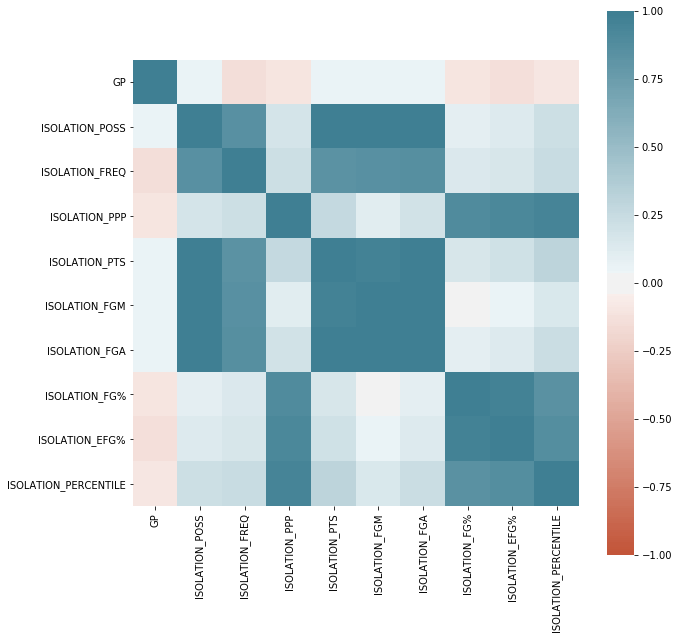

In [47]:
HeatMap(isolation, -1, 1)

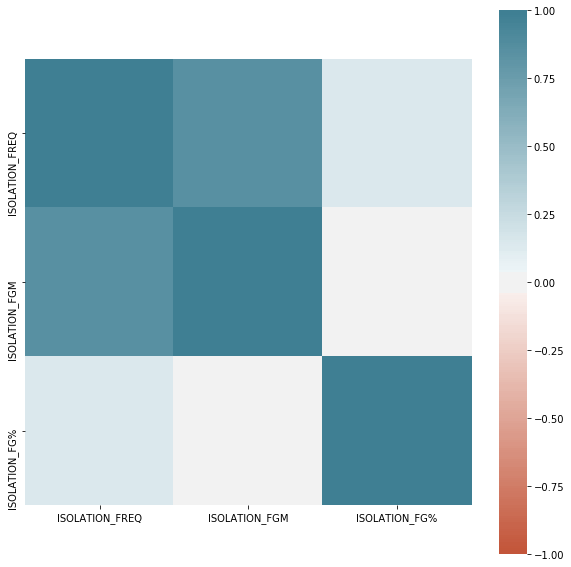

In [48]:
isolation = isolation[['PLAYER', 'TEAM', 'ISOLATION_FREQ', 'ISOLATION_FGM', 'ISOLATION_FG%']]
HeatMap(isolation, -1, 1)

In [49]:
print(pnr_handler.shape)
pnr_handler.head()

(308, 17)


PLAYER TEAM    GP  PNR_HANDLER_POSS  PNR_HANDLER_FREQ  \
1      Kemba Walker  CHA  82.0              11.8             0.468   
2    Damian Lillard  POR  80.0              10.9             0.447   
3  D'Angelo Russell  BKN  81.0              11.4             0.499   
4  Donovan Mitchell  UTA  77.0              11.1             0.445   
5      Lou Williams  LAC  75.0              11.1             0.546   

   PNR_HANDLER_PPP  PNR_HANDLER_PTS  PNR_HANDLER_FGM  PNR_HANDLER_FGA  \
1             1.01             11.9              5.3              9.5   
2             1.08             11.7              4.5              8.7   
3             0.89             10.1              5.2              9.3   
4             0.95             10.5              5.0              9.0   
5             0.96             10.6              4.5              8.0   

   PNR_HANDLER_FG%  PNR_HANDLER_EFG% PNR_HANDLER_FT_FREQ PNR_HANDLER_TOV_FREQ  \
1            0.446             0.515               0.105                0.112   
2            0.478             0.553               0.113                0.107   
3            0.440             0.496               0.052                0.136   
4            0.450             0.498               0.098                0.114   
5            0.442             0.472                0.17                0.139   

  PNR_HANDLER_SF_FREQ PNR_HANDLER_AND ONE_FREQ PNR_HANDLER_SCORE_FREQ  \
1               0.094                     0.02                  0.441   
2               0.076                    0.024                  0.471   
3               0.041                    0.007                  0.403   
4               0.082                    0.022                  0.436   
5               0.133                    0.035                  0.454   

   PNR_HANDLER_PERCENTILE  
1                    90.9  
2                    94.8  
3                    67.2  
4                    78.7  
5                    80.2

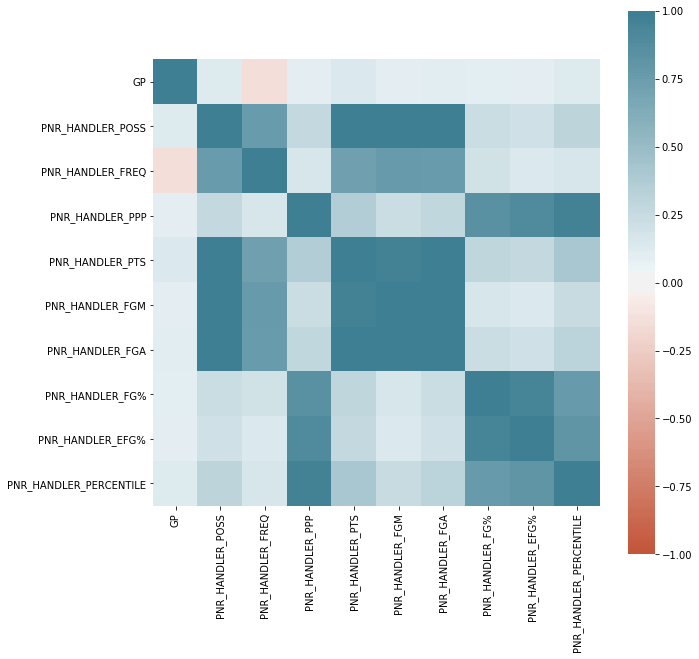

In [50]:
HeatMap(pnr_handler, -1, 1)

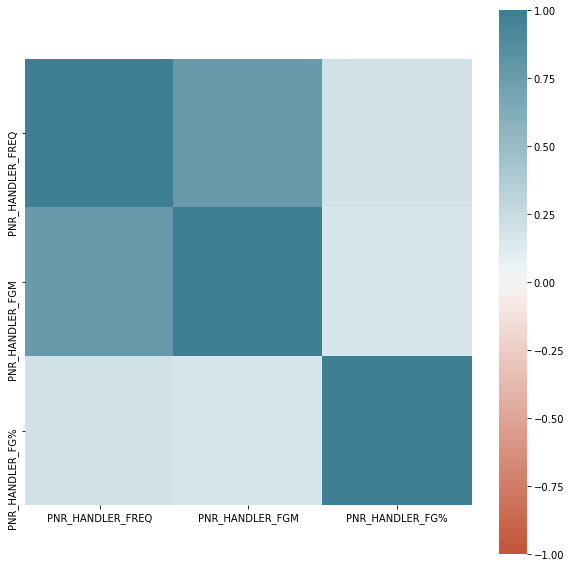

In [51]:
pnr_handler = pnr_handler[['PLAYER', 'TEAM', 'PNR_HANDLER_FREQ', 'PNR_HANDLER_FGM', 'PNR_HANDLER_FG%']]
HeatMap(pnr_handler, -1, 1)

In [52]:
print(pnr_roll.shape)
pnr_roll.head()

(201, 17)


PLAYER TEAM    GP  PNR_ROLL_POSS  PNR_ROLL_FREQ  PNR_ROLL_PPP  \
1    Nikola Vucevic  ORL  80.0            4.1          0.205          1.13   
2       Rudy Gobert  UTA  81.0            3.4          0.253          1.35   
3  Montrezl Harrell  LAC  82.0            3.4          0.233          1.31   
4      Myles Turner  IND  74.0            4.7          0.359          1.03   
5       Serge Ibaka  TOR  74.0            4.3          0.297          1.10   

   PNR_ROLL_PTS  PNR_ROLL_FGM  PNR_ROLL_FGA  PNR_ROLL_FG%  PNR_ROLL_EFG%  \
1           4.7           1.6           3.6         0.542          0.585   
2           4.5           0.7           2.4         0.709          0.709   
3           4.4           0.8           2.7         0.689          0.692   
4           4.9           2.1           4.1         0.482          0.526   
5           4.7           1.7           3.8         0.546          0.559   

  PNR_ROLL_FT_FREQ PNR_ROLL_TOV_FREQ PNR_ROLL_SF_FREQ PNR_ROLL_AND ONE_FREQ  \
1            0.069             0.073            0.069                 0.012   
2            0.283             0.063            0.268                  0.07   
3            0.205             0.083            0.201                 0.076   
4            0.095             0.063            0.092                 0.026   
5            0.085             0.044            0.082                 0.013   

  PNR_ROLL_SCORE_FREQ  PNR_ROLL_PERCENTILE  
1               0.529                 61.1  
2               0.691                 93.1  
3               0.662                 87.5  
4               0.481                 41.7  
5               0.552                 56.5

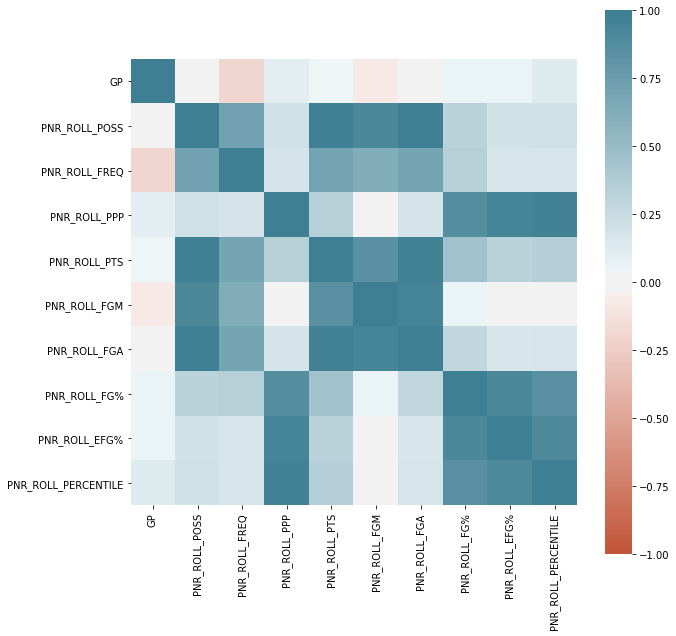

In [53]:
HeatMap(pnr_roll, -1, 1)

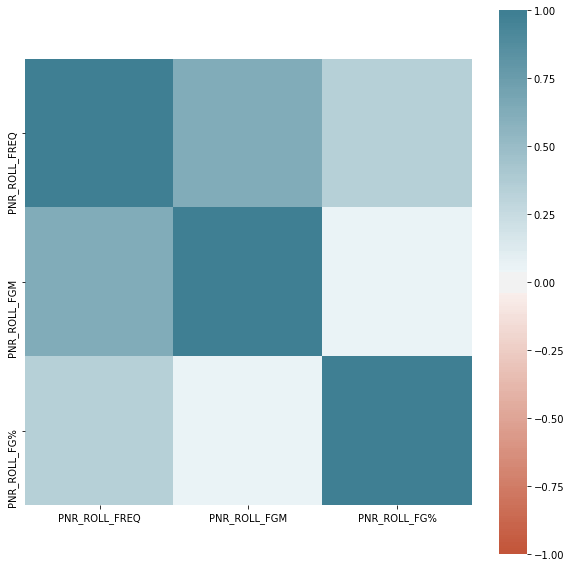

In [54]:
pnr_roll = pnr_roll[['PLAYER', 'TEAM', 'PNR_ROLL_FREQ', 'PNR_ROLL_FGM', 'PNR_ROLL_FG%']]
HeatMap(pnr_roll, -1, 1)

In [55]:
print(transition.shape)
transition.head()

(458, 17)


PLAYER TEAM    GP  TRANSITION_POSS  TRANSITION_FREQ  \
1  Giannis Antetokounmpo  MIL  72.0              6.4            0.256   
2            Buddy Hield  SAC  82.0              5.0            0.261   
3           Bradley Beal  WAS  82.0              5.1            0.209   
4            Paul George  OKC  76.0              5.4            0.206   
5           Kevin Durant  GSW  78.0              4.9            0.211   

   TRANSITION_PPP  TRANSITION_PTS  TRANSITION_FGM  TRANSITION_FGA  \
1            1.14             7.3             1.4             3.9   
2            1.21             6.0             2.1             4.4   
3            1.14             5.8             2.1             4.1   
4            1.11             6.0             2.3             4.4   
5            1.17             5.8             1.4             3.5   

   TRANSITION_FG%  TRANSITION_EFG% TRANSITION_FT_FREQ TRANSITION_TOV_FREQ  \
1           0.640            0.649              0.286               0.169   
2           0.510            0.620              0.075               0.073   
3           0.488            0.590              0.117               0.093   
4           0.482            0.567              0.121               0.097   
5           0.585            0.629              0.181                0.15   

  TRANSITION_SF_FREQ TRANSITION_AND ONE_FREQ TRANSITION_SCORE_FREQ  \
1              0.266                   0.063                 0.587   
2              0.073                   0.022                 0.499   
3              0.103                   0.017                 0.492   
4              0.097                   0.029                 0.478   
5              0.168                   0.039                 0.547   

   TRANSITION_PERCENTILE  
1                   55.8  
2                   70.2  
3                   55.6  
4                   49.6  
5                   63.4

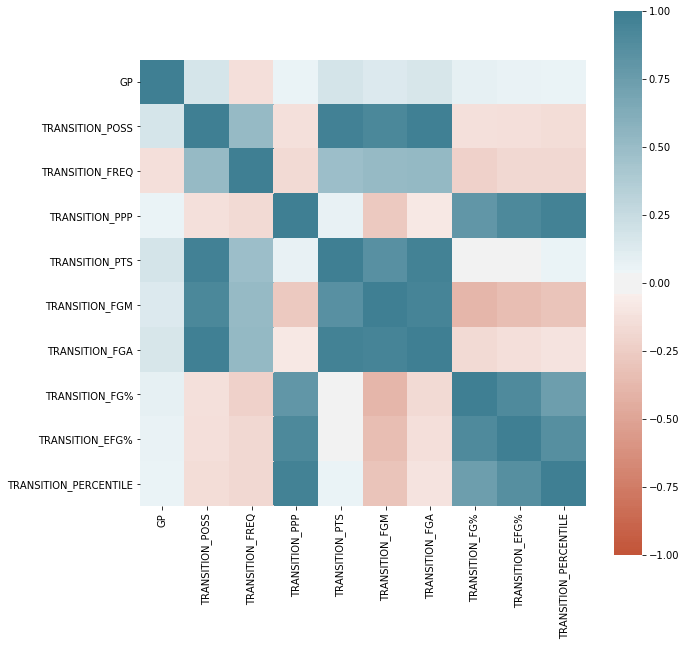

In [56]:
HeatMap(transition, -1, 1)

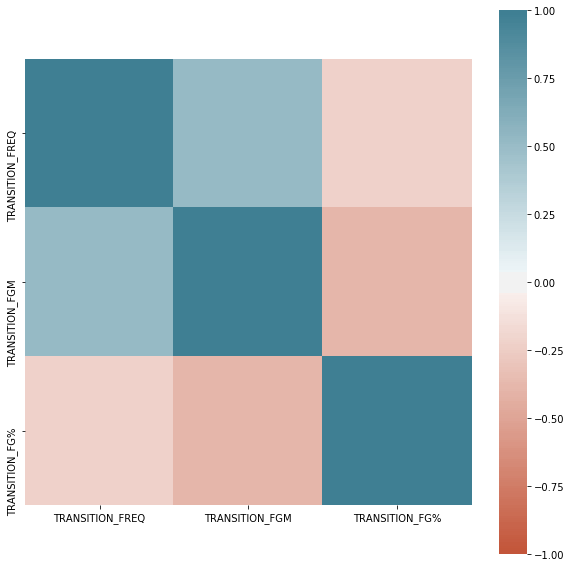

In [57]:
transition = transition[['PLAYER', 'TEAM', 'TRANSITION_FREQ', 'TRANSITION_FGM', 'TRANSITION_FG%']]
HeatMap(transition, -1, 1)

In [58]:
print(post_up.shape)
post_up.head()

(195, 17)


PLAYER TEAM    GP  POST_UP_POSS  POST_UP_FREQ  POST_UP_PPP  \
1   LaMarcus Aldridge  SAS  81.0           8.6         0.427         1.04   
2         Joel Embiid  PHI  64.0           8.1         0.299         1.05   
3  Karl-Anthony Towns  MIN  77.0           6.8         0.302         1.02   
4       Blake Griffin  DET  75.0           6.4         0.264         0.92   
5        Nikola Jokic  DEN  80.0           5.1         0.254         1.03   

   POST_UP_PTS  POST_UP_FGM  POST_UP_FGA  POST_UP_FG%  POST_UP_EFG%  \
1          9.0          3.4          7.0        0.506         0.506   
2          8.5          2.6          5.2        0.501         0.501   
3          7.0          2.3          5.0        0.541         0.541   
4          5.9          2.3          4.4        0.486         0.486   
5          5.2          1.9          3.9        0.524         0.524   

  POST_UP_FT_FREQ POST_UP_TOV_FREQ POST_UP_SF_FREQ POST_UP_AND ONE_FREQ  \
1           0.157            0.073           0.133                0.037   
2           0.266            0.131           0.207                0.044   
3           0.154            0.152           0.127                0.038   
4           0.199            0.149           0.159                0.037   
5           0.152            0.113            0.12                0.029   

  POST_UP_SCORE_FREQ  POST_UP_PERCENTILE  
1              0.524                76.5  
2              0.537                78.4  
3               0.51                73.5  
4              0.482                49.5  
5              0.521                75.5

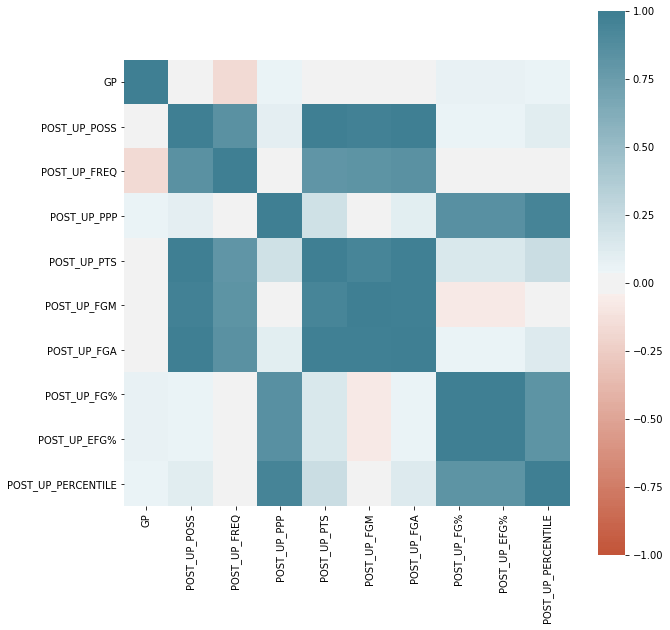

In [59]:
HeatMap(post_up, -1, 1)

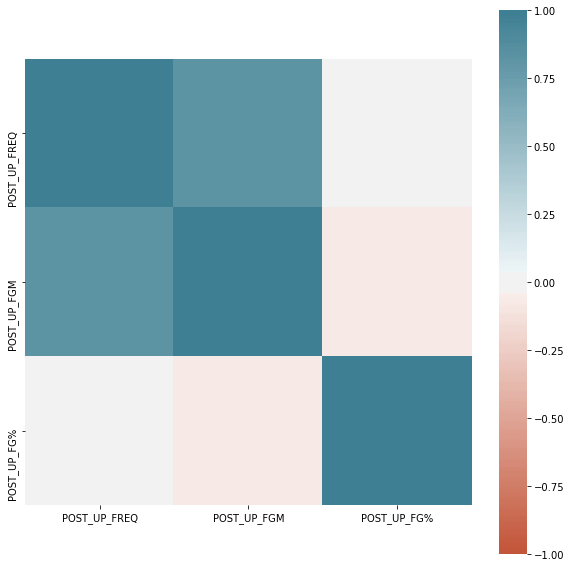

In [60]:
post_up = post_up[['PLAYER', 'TEAM', 'POST_UP_FREQ', 'POST_UP_FGM', 'POST_UP_FG%']]
HeatMap(post_up, -1, 1)

In [61]:
print(spot_up.shape)
spot_up.head()

(458, 17)


PLAYER TEAM    GP  SPOT_UP_POSS  SPOT_UP_FREQ  SPOT_UP_PPP  \
1   Jae Crowder  UTA  80.0           5.3         0.439         1.07   
2   Eric Gordon  HOU  68.0           5.2         0.324         1.14   
3   Brook Lopez  MIL  81.0           4.4         0.391         1.11   
4   Bryn Forbes  SAS  82.0           4.0         0.360         1.22   
5  Jerami Grant  OKC  79.0           4.3         0.354         1.05   

   SPOT_UP_PTS  SPOT_UP_FGM  SPOT_UP_FGA  SPOT_UP_FG%  SPOT_UP_EFG%  \
1          5.7          2.9          4.8        0.394         0.533   
2          5.9          2.8          4.9        0.422         0.584   
3          5.0          2.4          4.1        0.409         0.568   
4          4.8          2.0          3.7        0.458         0.606   
5          4.5          2.3          3.9        0.407         0.549   

  SPOT_UP_FT_FREQ SPOT_UP_TOV_FREQ SPOT_UP_SF_FREQ SPOT_UP_AND ONE_FREQ  \
1           0.083            0.045           0.075                0.026   
2           0.034            0.034           0.031                0.008   
3           0.047            0.042           0.044                0.006   
4           0.052             0.04           0.049                0.022   
5           0.061            0.056           0.056                0.009   

  SPOT_UP_SCORE_FREQ  SPOT_UP_PERCENTILE  
1               0.41                71.1  
2              0.419                85.1  
3              0.417                79.8  
4              0.457                92.5  
5              0.406                67.1

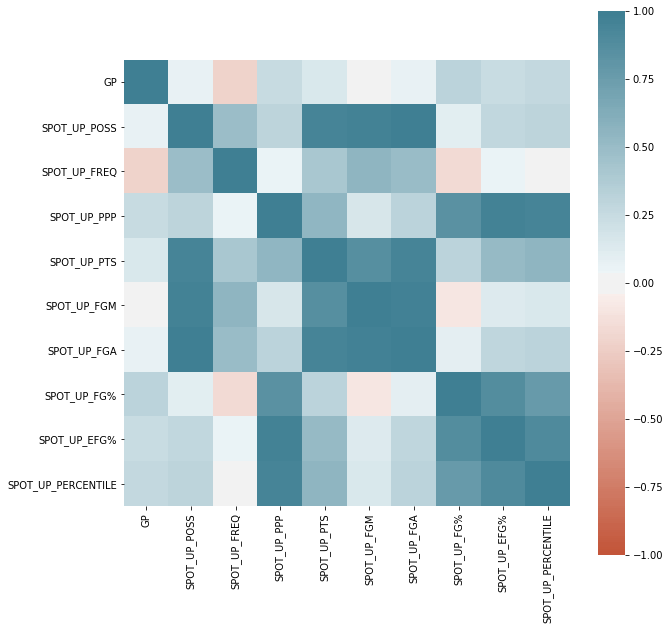

In [62]:
HeatMap(spot_up, -1, 1)

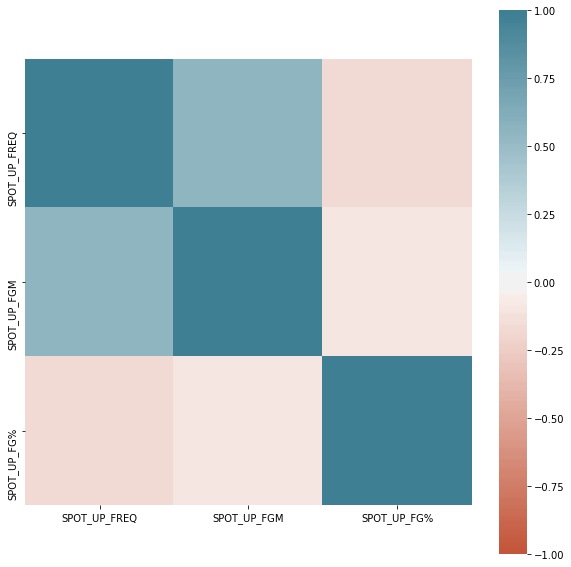

In [63]:
spot_up = spot_up[['PLAYER', 'TEAM', 'SPOT_UP_FREQ', 'SPOT_UP_FGM', 'SPOT_UP_FG%']]
HeatMap(spot_up, -1, 1)

In [64]:
print(handoff.shape)
handoff.head()

(280, 17)


PLAYER TEAM    GP  HANDOFF_POSS  HANDOFF_FREQ  HANDOFF_PPP  \
1        JJ Redick  PHI  76.0           5.2         0.324         1.10   
2     Jamal Murray  DEN  75.0           2.9         0.154         0.97   
3      Gary Harris  DEN  57.0           3.6         0.266         0.98   
4   Damian Lillard  POR  80.0           2.6         0.109         0.93   
5  Josh Richardson  MIA  73.0           2.4         0.141         1.01   

   HANDOFF_PTS  HANDOFF_FGM  HANDOFF_FGA  HANDOFF_FG%  HANDOFF_EFG%  \
1          5.7          2.5          4.5        0.449         0.564   
2          2.8          1.3          2.5        0.451         0.503   
3          3.5          1.7          3.1        0.443         0.494   
4          2.5          1.3          2.0        0.384         0.482   
5          2.4          1.2          2.0        0.396         0.497   

  HANDOFF_FT_FREQ HANDOFF_TOV_FREQ HANDOFF_SF_FREQ HANDOFF_AND ONE_FREQ  \
1           0.063            0.076           0.056                0.013   
2           0.069            0.092           0.055                0.005   
3           0.103            0.054           0.093                 0.02   
4           0.081            0.147           0.062                0.005   
5            0.08            0.075           0.057                0.011   

  HANDOFF_SCORE_FREQ  HANDOFF_PERCENTILE  
1              0.443                85.0  
2              0.445                62.2  
3              0.466                64.6  
4              0.374                53.1  
5              0.408                70.6

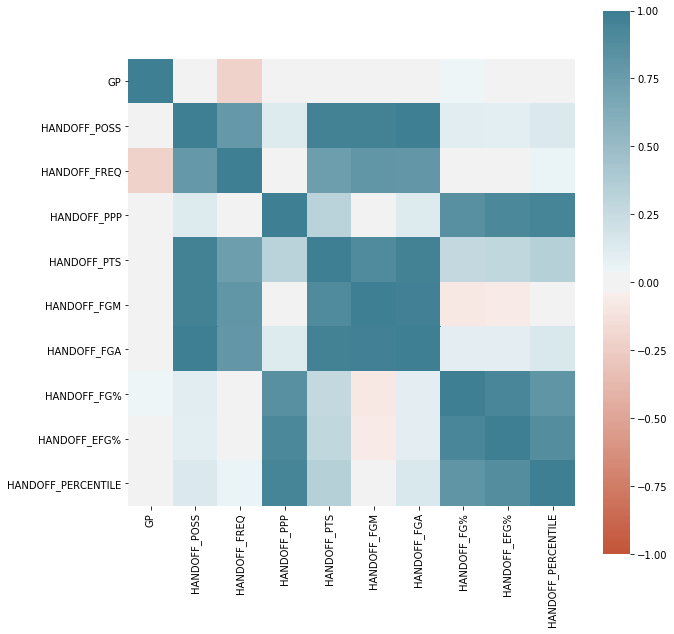

In [65]:
HeatMap(handoff, -1, 1)

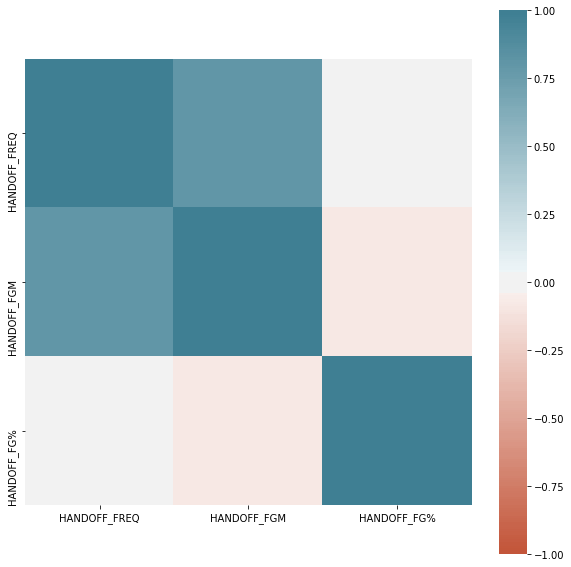

In [66]:
handoff = handoff[['PLAYER', 'TEAM', 'HANDOFF_FREQ', 'HANDOFF_FGM', 'HANDOFF_FG%']]
HeatMap(handoff, -1, 1)

In [67]:
print(cut.shape)
cut.head()

(360, 17)


PLAYER TEAM    GP  CUT_POSS  CUT_FREQ  CUT_PPP  CUT_PTS  CUT_FGM  \
1       Rudy Gobert  UTA  81.0       3.5     0.264     1.29      4.5      0.8   
2      Clint Capela  HOU  67.0       4.0     0.283     1.35      5.3      1.1   
3      JaVale McGee  LAL  75.0       2.9     0.265     1.38      4.0      0.7   
4  Montrezl Harrell  LAC  82.0       2.5     0.172     1.42      3.5      0.6   
5       Ben Simmons  PHI  79.0       2.7     0.151     1.30      3.5      0.7   

   CUT_FGA  CUT_FG%  CUT_EFG% CUT_FT_FREQ CUT_TOV_FREQ CUT_SF_FREQ  \
1      2.6    0.692     0.692       0.229         0.06       0.232   
2      3.5    0.695     0.695       0.117        0.019       0.117   
3      2.5    0.714     0.714        0.13        0.051       0.125   
4      2.0    0.719     0.719       0.234        0.049       0.234   
5      2.3    0.689     0.689       0.126        0.065       0.121   

  CUT_AND ONE_FREQ CUT_SCORE_FREQ  CUT_PERCENTILE  
1            0.046          0.683            52.3  
2             0.03          0.687            64.6  
3            0.037          0.694            72.7  
4            0.098          0.698            76.7  
5            0.028          0.665            53.9

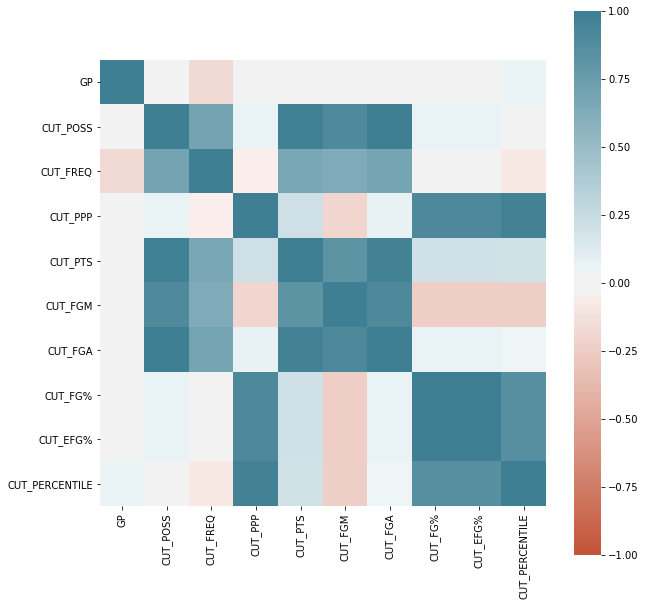

In [68]:
HeatMap(cut, -1, 1)

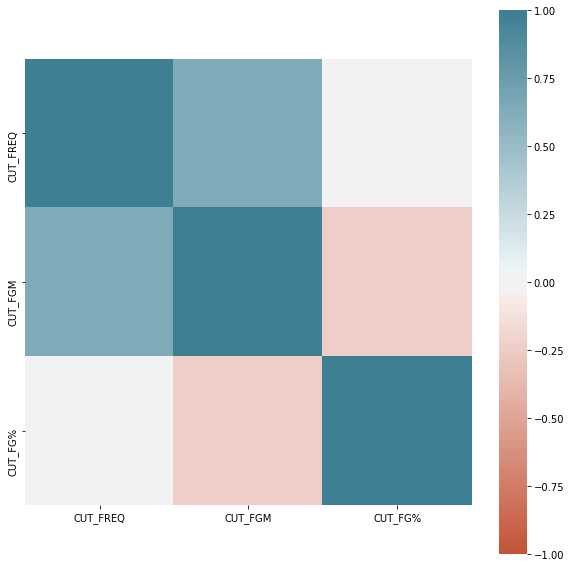

In [69]:
cut = cut[['PLAYER', 'TEAM', 'CUT_FREQ', 'CUT_FGM', 'CUT_FG%']]
HeatMap(cut, -1, 1)

In [70]:
print(off_screen.shape)
off_screen.head()

(229, 17)


PLAYER TEAM    GP  OFF_SCREEN_POSS  OFF_SCREEN_FREQ  \
1     Klay Thompson  GSW  78.0              6.9            0.342   
2     Stephen Curry  GSW  69.0              4.8            0.201   
3        Joe Harris  BKN  76.0              3.7            0.301   
4  Bojan Bogdanovic  IND  81.0              3.5            0.218   
5     Terrence Ross  ORL  81.0              3.7            0.258   

   OFF_SCREEN_PPP  OFF_SCREEN_PTS  OFF_SCREEN_FGM  OFF_SCREEN_FGA  \
1            1.05             7.3             3.6             6.4   
2            1.29             6.1             2.3             4.4   
3            1.29             4.7             1.4             3.1   
4            1.08             3.8             1.6             2.9   
5            0.97             3.6             2.0             3.4   

   OFF_SCREEN_FG%  OFF_SCREEN_EFG% OFF_SCREEN_FT_FREQ OFF_SCREEN_TOV_FREQ  \
1           0.438            0.544               0.03               0.052   
2           0.467            0.641              0.052               0.043   
3           0.555            0.691              0.072               0.094   
4           0.464            0.536              0.123               0.077   
5           0.405            0.482              0.047                0.05   

  OFF_SCREEN_SF_FREQ OFF_SCREEN_AND ONE_FREQ OFF_SCREEN_SCORE_FREQ  \
1               0.03                   0.007                 0.427   
2              0.049                   0.012                 0.468   
3              0.061                   0.022                 0.522   
4              0.116                   0.025                 0.481   
5               0.04                    0.01                 0.407   

   OFF_SCREEN_PERCENTILE  
1                   72.0  
2                   97.0  
3                   97.4  
4                   77.2  
5                   53.9

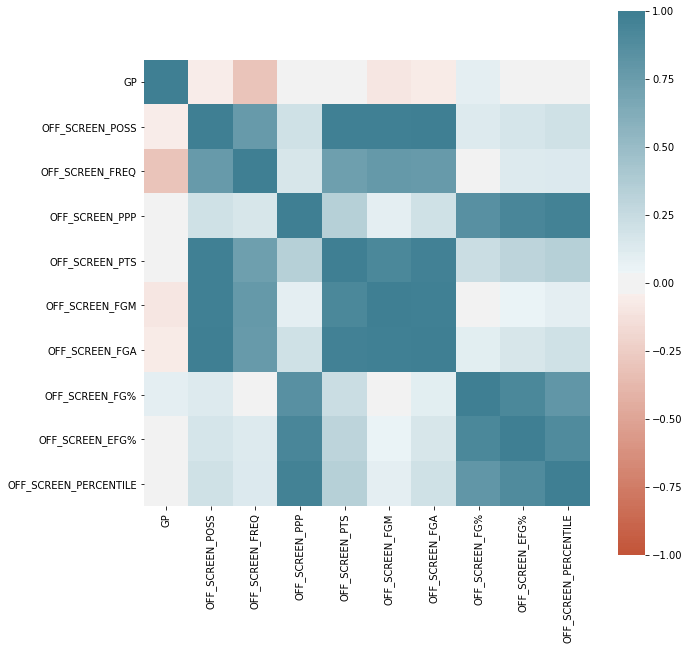

In [71]:
HeatMap(off_screen, -1, 1)

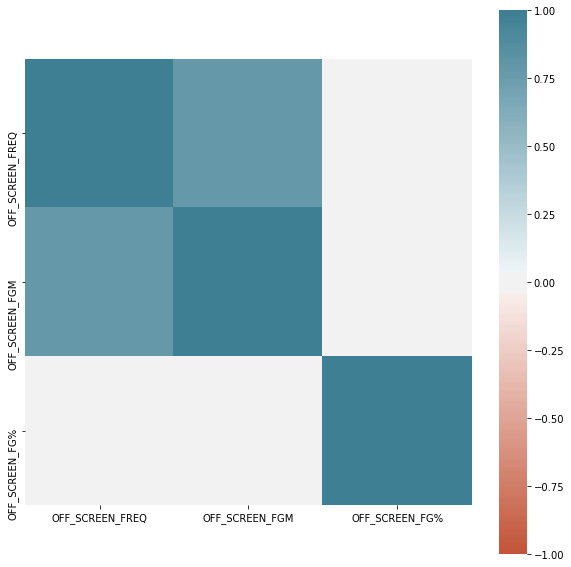

In [72]:
off_screen = off_screen[['PLAYER', 'TEAM', 'OFF_SCREEN_FREQ', 'OFF_SCREEN_FGM', 'OFF_SCREEN_FG%']]
HeatMap(off_screen, -1, 1)

In [73]:
print(putback.shape)
putback.head()

(277, 17)


PLAYER TEAM    GP  PUTBACK_POSS  PUTBACK_FREQ  PUTBACK_PPP  \
1   Hassan Whiteside  POR  61.0           3.3         0.231         1.29   
2     Andre Drummond  DET  49.0           3.8         0.192         1.05   
3  Mitchell Robinson  NYK  61.0           2.6         0.352         1.22   
4        Rudy Gobert  UTA  62.0           2.7         0.206         1.15   
5  Jonas Valanciunas  MEM  62.0           2.5         0.185         1.21   

   PUTBACK_PTS  PUTBACK_FGM  PUTBACK_FGA  PUTBACK_FG%  PUTBACK_EFG%  \
1          4.3          1.0          3.0        0.661         0.661   
2          4.0          1.4          3.1        0.552         0.552   
3          3.1          0.8          2.1        0.638         0.638   
4          3.1          0.8          2.1        0.631         0.631   
5          3.0          0.8          2.2        0.630         0.630   

  PUTBACK_FT_FREQ PUTBACK_TOV_FREQ PUTBACK_SF_FREQ PUTBACK_AND ONE_FREQ  \
1           0.103            0.039           0.103                0.025   
2           0.124            0.075           0.113                0.027   
3           0.217            0.019           0.217                0.051   
4           0.158            0.085           0.152                 0.03   
5           0.083            0.064           0.083                0.013   

  PUTBACK_SCORE_FREQ  PUTBACK_PERCENTILE  
1              0.647                82.6  
2              0.543                44.8  
3              0.637                73.0  
4                0.6                63.0  
5              0.603                72.2

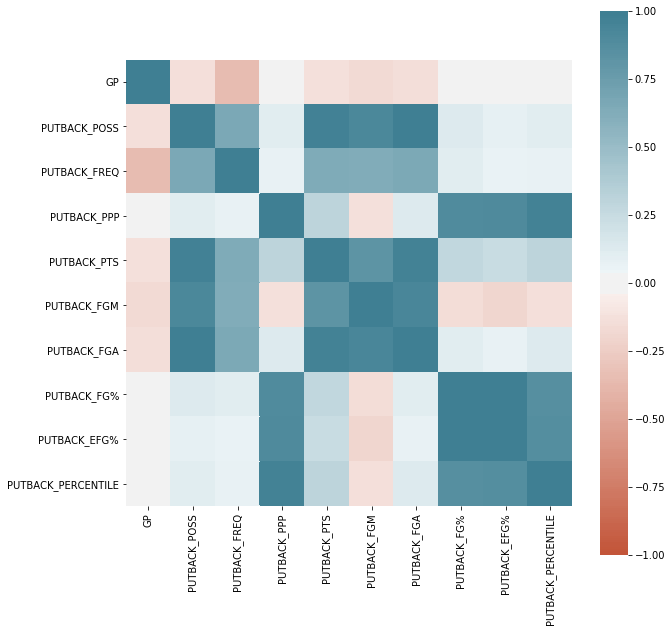

In [74]:
HeatMap(putback, -1, 1)

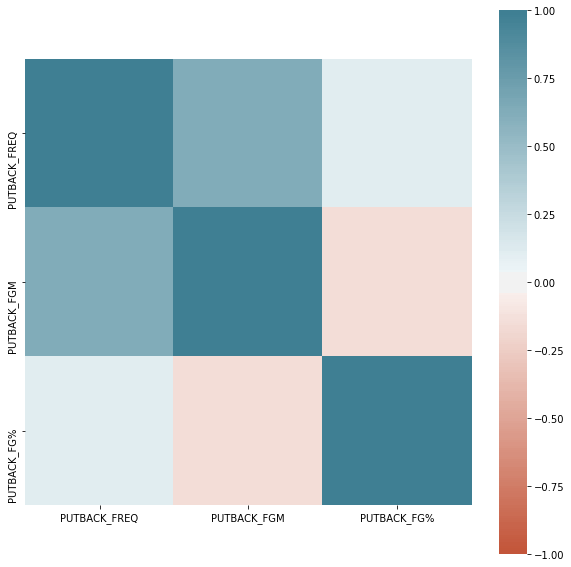

In [75]:
putback = putback[['PLAYER', 'TEAM', 'PUTBACK_FREQ', 'PUTBACK_FGM', 'PUTBACK_FG%']]
HeatMap(putback, -1, 1)

In [76]:
play_type = isolation.merge(pnr_handler, how = 'outer')
play_type = play_type.merge(pnr_roll, how = 'outer')
play_type = play_type.merge(transition, how = 'outer')
play_type = play_type.merge(post_up, how = 'outer')
play_type = play_type.merge(spot_up, how = 'outer')
play_type = play_type.merge(handoff, how = 'outer')
play_type = play_type.merge(cut, how = 'outer')
play_type = play_type.merge(off_screen, how = 'outer')
play_type = play_type.merge(putback, how = 'outer')

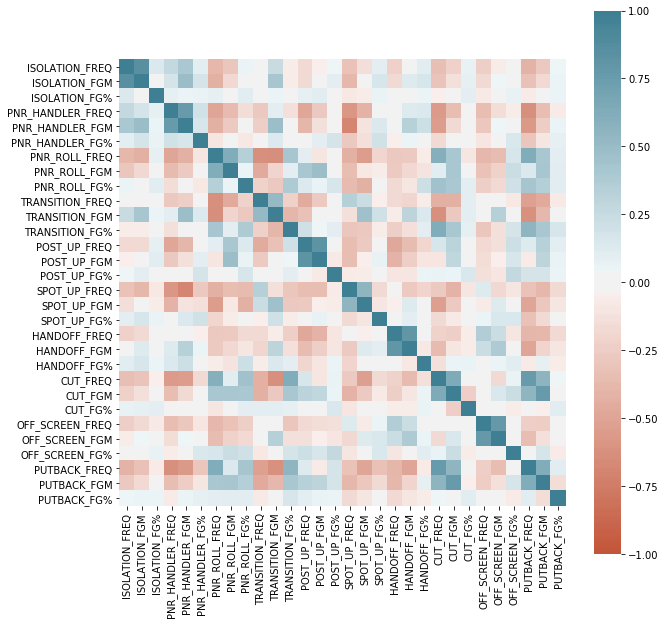

In [78]:
HeatMap(play_type, -1, 1)

# Passing

In [79]:
print(passing.shape)
passing.head()

(530, 15)


PLAYER TEAM    GP     W     L   MIN  PASSES MADE  PASSES RECEIVED  \
1     Aaron Gordon  ORL  76.0  38.0  38.0  33.8         35.9             32.2   
2    Aaron Holiday  IND  50.0  31.0  19.0  12.9         15.6             20.3   
3      Abdel Nader  OKC  60.0  37.0  23.0  11.4          5.7              6.7   
4       Al Horford  BOS  68.0  41.0  27.0  29.0         42.9             39.2   
5  Al-Farouq Aminu  POR  81.0  52.0  29.0  28.3         25.9             16.2   

   AST  SECONDARY AST  POTENTIAL AST  AST PTS CREATED  AST ADJ  AST TO PASS%  \
1  3.7            0.4            6.6              8.7      4.1          10.2   
2  1.7            0.3            3.1              4.0      2.1          11.2   
3  0.3            0.1            0.7              0.8      0.4           5.8   
4  4.2            0.5            7.5             10.7      4.8           9.7   
5  1.3            0.2            2.2              3.1      1.5           5.0   

   AST TO PASS% ADJ  
1              11.3  
2              13.6  
3               6.7  
4              11.2  
5               5.9

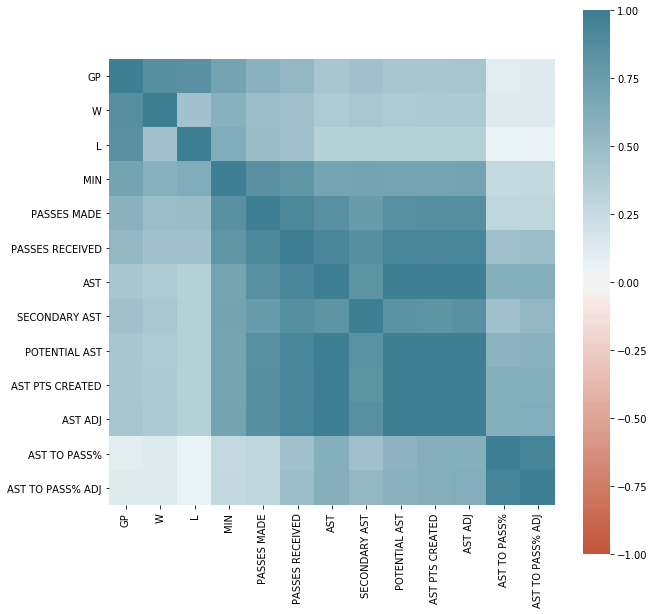

In [80]:
HeatMap(passing, -1, 1)

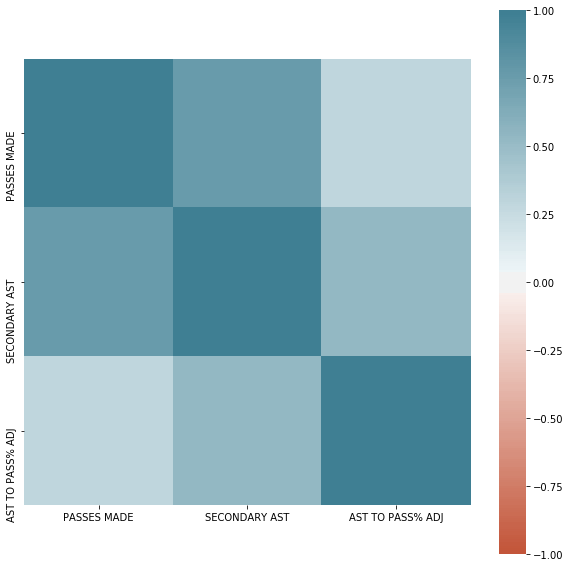

In [81]:
passing.drop(['GP', 'W', 'L', 'MIN', 'AST ADJ', 'AST', 'POTENTIAL AST', 'AST TO PASS%', 'PASSES RECEIVED', 'AST PTS CREATED'], axis = 1, inplace = True)
HeatMap(passing, -1, 1)

In [82]:
X = passing.drop(['PLAYER', 'TEAM'], axis = 1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns)

PASSES MADE         5.853705
SECONDARY AST       5.269540
AST TO PASS% ADJ    3.517465
dtype: float64

# Merge

In [83]:
general.head()

PLAYER TEAM  AGE   MIN   PTS   FG%   3P%  OREB  DREB  AST  \
0           James Harden  HOU   29  36.8  36.1  44.2  36.8   0.8   5.8  7.5   
1            Paul George  OKC   29  36.9  28.0  43.8  38.6   1.4   6.8  4.1   
2  Giannis Antetokounmpo  MIL   24  32.8  27.7  57.8  25.6   2.2  10.3  5.9   
3            Joel Embiid  PHI   25  33.7  27.5  48.4  30.0   2.5  11.1  3.7   
4           LeBron James  LAL   34  35.2  27.4  51.0  33.9   1.0   7.4  8.3   

   STL  BLK  +/-  
0  2.0  0.7  4.6  
1  2.2  0.4  6.4  
2  1.3  1.5  9.1  
3  0.7  1.9  5.8  
4  1.3  0.6  2.1

In [84]:
advanced.head()

PLAYER TEAM  AST%  AST/TO  OREB%  DREB%  TO RATIO   TS%  USG%   PIE
0    Bam Adebayo  MIA  14.6    1.52    8.3   22.1      13.6  62.3  15.7  13.3
1   Bradley Beal  WAS  23.3    2.00    2.8   10.4       9.1  58.1  27.7  12.8
2    Bryn Forbes  SAS  10.5    2.19    0.8    9.6       7.5  58.6  17.1   7.7
3    Buddy Hield  SAC  11.7    1.40    3.6   11.0       8.2  58.7  24.3  11.0
4  Collin Sexton  CLE  15.4    1.31    2.1    7.2      10.6  52.0  24.7   7.3

In [85]:
defense.head()

PLAYER TEAM POSITION  <6_FREQ  <6_DFGM  <6_DIFF%  6-9_FREQ  6-9_DFGM  \
0   Joel Embiid  PHI      F-C     49.5      4.8      -9.4      10.2       0.6   
1   Rudy Gobert  UTA        C     48.8      4.5     -11.0      14.6       1.0   
2  Clint Capela  HOU        C     43.4      4.5      -4.2      13.0       1.0   
3  Steven Adams  OKC        C     44.3      4.2      -4.7      12.2       0.9   
4   Brook Lopez  MIL        C     39.9      3.3     -11.5      13.6       0.9   

   6-9_DIFF%  10-15_FREQ  10-15_DFGM  10-15_DIFF%  16-3PT_FREQ  16-3PT_DFGM  \
0      -20.6         7.5         0.7         -1.4         12.4          0.9   
1      -14.3         9.6         0.6        -17.4         12.4          1.0   
2       -8.7         7.3         0.6         -1.4         11.9          0.8   
3       -7.7         7.9         0.6         -4.7         12.2          0.8   
4      -11.4         9.9         0.7         -9.2         11.7          0.9   

   16-3PT_DIFF%  3PT_FREQ  3PT_DFGM  3PT_DIFF%  
0           1.7      20.5       1.4        2.9  
1           7.3      14.7       0.9        1.5  
2          -0.3      24.2       1.4       -1.7  
3           1.4      23.0       1.3       -1.3  
4           9.5      24.6       1.5        4.4

In [86]:
hustle.head()

PLAYER TEAM  SCREEN ASSISTS  DEFLECTIONS  LOOSE BALLS RECOVERED  \
1     Aaron Gordon  ORL             0.9          1.3                    1.2   
2    Aaron Holiday  IND             0.0          0.7                    0.3   
3      Abdel Nader  OKC             0.0          0.5                    0.4   
4       Al Horford  BOS             3.3          1.4                    0.8   
5  Al-Farouq Aminu  POR             1.0          1.9                    1.0   

   CHARGES DRAWN  CONTESTED 2PT SHOTS  CONTESTED 3PT SHOTS  
1           0.01                  4.4                  2.1  
2           0.00                  1.5                  1.0  
3           0.02                  2.1                  1.6  
4           0.00                  8.8                  2.9  
5           0.02                  4.4                  3.0

In [87]:
shooting.head()

index           PLAYER TEAM  AGE  FGM_<5  FG%_<5  FGM_5-9  FG%_5-9  \
1      1     Aaron Gordon  ORL   23     3.2    60.9      0.3     34.7   
2      2    Aaron Holiday  IND   22     0.6    58.2      0.2     31.8   
3      3      Abdel Nader  OKC   25     0.8    56.5      0.2     39.1   
4      4       Al Horford  BOS   33     2.3    68.8      0.8     55.3   
5      5  Al-Farouq Aminu  POR   28     1.7    59.6      0.2     37.1   

   FGM_10-14  FG%_10-14  FGM_15-19  FG%_15-19  FGM_20-24  FG%_20-24  \
1        0.5       38.4        0.4       29.6        0.8       40.4   
2        0.1       31.3        0.3       41.2        0.3       40.6   
3        0.0        0.0        0.0        0.0        0.3       36.4   
4        0.5       49.3        0.8       55.8        0.4       35.3   
5        0.0       13.3        0.0       22.2        0.7       36.6   

   FGM_25-29  FG%_25-29  
1        0.9       32.7  
2        0.7       34.7  
3        0.3       30.4  
4        0.9       39.7  
5        0.5       30.2

In [88]:
play_type.head()

PLAYER TEAM  ISOLATION_FREQ  ISOLATION_FGM  ISOLATION_FG%  \
0     Aaron Gordon  ORL           0.060            0.5          0.365   
1    Aaron Holiday  IND           0.040            0.1          0.417   
2      Abdel Nader  OKC           0.049            0.0          0.778   
3       Al Horford  BOS           0.028            0.1          0.583   
4  Al-Farouq Aminu  POR           0.034            0.1          0.474   

   PNR_HANDLER_FREQ  PNR_HANDLER_FGM  PNR_HANDLER_FG%  PNR_ROLL_FREQ  \
0             0.121              0.9            0.383          0.026   
1             0.322              1.1            0.367            NaN   
2             0.089              0.2            0.412            NaN   
3               NaN              NaN              NaN          0.316   
4             0.022              0.1            0.154          0.035   

   PNR_ROLL_FGM  PNR_ROLL_FG%  TRANSITION_FREQ  TRANSITION_FGM  \
0           0.3         0.375            0.140             0.8   
1           NaN           NaN            0.189             0.5   
2           NaN           NaN            0.236             0.4   
3           1.6         0.548            0.085             0.4   
4           0.1         0.500            0.154             0.5   

   TRANSITION_FG%  POST_UP_FREQ  POST_UP_FGM  POST_UP_FG%  SPOT_UP_FREQ  \
0           0.542         0.132          1.0         0.42         0.204   
1           0.444           NaN          NaN          NaN         0.238   
2           0.500           NaN          NaN          NaN         0.492   
3           0.554         0.165          0.8         0.53         0.176   
4           0.538           NaN          NaN          NaN         0.470   

   SPOT_UP_FGM  SPOT_UP_FG%  HANDOFF_FREQ  HANDOFF_FGM  HANDOFF_FG%  CUT_FREQ  \
0          1.8        0.391         0.069          0.5        0.456     0.069   
1          0.9        0.394         0.111          0.3        0.414       NaN   
2          1.2        0.364           NaN          NaN          NaN       NaN   
3          1.2        0.430           NaN          NaN          NaN     0.090   
4          2.4        0.364         0.015          0.1        0.222     0.103   

   CUT_FGM  CUT_FG%  OFF_SCREEN_FREQ  OFF_SCREEN_FGM  OFF_SCREEN_FG%  \
0      0.3    0.688            0.069             0.7           0.366   
1      NaN      NaN              NaN             NaN             NaN   
2      NaN      NaN              NaN             NaN             NaN   
3      0.3    0.704            0.019             0.1           0.462   
4      0.2    0.648            0.026             0.2           0.211   

   PUTBACK_FREQ  PUTBACK_FGM  PUTBACK_FG%  
0         0.083          0.5        0.554  
1           NaN          NaN          NaN  
2           NaN          NaN          NaN  
3           NaN          NaN          NaN  
4           NaN          NaN          NaN

In [89]:
passing.head()

PLAYER TEAM  PASSES MADE  SECONDARY AST  AST TO PASS% ADJ
1     Aaron Gordon  ORL         35.9            0.4              11.3
2    Aaron Holiday  IND         15.6            0.3              13.6
3      Abdel Nader  OKC          5.7            0.1               6.7
4       Al Horford  BOS         42.9            0.5              11.2
5  Al-Farouq Aminu  POR         25.9            0.2               5.9

In [90]:
data = general.merge(advanced)
data = data.merge(defense, how = 'left')
data = data.merge(hustle)
data = data.merge(shooting.drop('AGE', axis = 1))
data = data.merge(play_type, how = 'left')
data = data.merge(passing)
data.fillna(0, inplace = True)
data.drop(['AGE', 'MIN'], axis = 1, inplace = True)
print(data.shape)
data.head()

(388, 87)


PLAYER TEAM   PTS   FG%   3P%  OREB  DREB  AST  STL  BLK  \
0           James Harden  HOU  36.1  44.2  36.8   0.8   5.8  7.5  2.0  0.7   
1            Paul George  OKC  28.0  43.8  38.6   1.4   6.8  4.1  2.2  0.4   
2  Giannis Antetokounmpo  MIL  27.7  57.8  25.6   2.2  10.3  5.9  1.3  1.5   
3            Joel Embiid  PHI  27.5  48.4  30.0   2.5  11.1  3.7  0.7  1.9   
4           LeBron James  LAL  27.4  51.0  33.9   1.0   7.4  8.3  1.3  0.6   

   +/-  AST%  AST/TO  OREB%  DREB%  TO RATIO   TS%  USG%   PIE POSITION  \
0  4.6  39.4    1.51    2.3   15.7      12.0  61.6  39.6  20.1        G   
1  6.4  17.3    1.55    3.3   17.3       8.7  58.3  28.5  16.1        F   
2  9.1  29.4    1.58    6.6   27.3      12.0  64.4  31.4  21.8        F   
3  5.8  18.5    1.04    7.5   29.2      11.6  59.3  32.7  19.6      F-C   
4  2.1  37.6    2.30    2.9   19.3      10.2  58.8  31.1  18.8        F   

   <6_FREQ  <6_DFGM  <6_DIFF%  6-9_FREQ  6-9_DFGM  6-9_DIFF%  10-15_FREQ  \
0     30.9      2.5       3.9      14.6       0.5      -24.9         8.1   
1     33.7      2.6       1.0       7.3       0.3      -18.5         6.5   
2     34.1      2.0      -9.9       9.0       0.3      -22.9         5.4   
3     49.5      4.8      -9.4      10.2       0.6      -20.6         7.5   
4     32.5      2.0      -0.2       9.9       0.4      -12.3         5.9   

   10-15_DFGM  10-15_DIFF%  16-3PT_FREQ  16-3PT_DFGM  16-3PT_DIFF%  3PT_FREQ  \
0         0.5          3.7          9.8          0.4          -3.7      36.8   
1         0.3         -5.4          8.1          0.5          12.1      44.0   
2         0.3          3.4          9.0          0.4           3.5      42.1   
3         0.7         -1.4         12.4          0.9           1.7      20.5   
4         0.3          5.2          9.9          0.2         -17.4      41.8   

   3PT_DFGM  3PT_DIFF%  SCREEN ASSISTS  DEFLECTIONS  LOOSE BALLS RECOVERED  \
0       1.6       -0.9             0.3          3.5                    1.5   
1       1.8       -1.7             0.5          3.8                    2.1   
2       1.5       -1.8             2.0          2.1                    1.6   
3       1.4        2.9             3.9          1.2                    1.4   
4       1.5       -0.6             0.7          1.8                    1.5   

   CHARGES DRAWN  CONTESTED 2PT SHOTS  CONTESTED 3PT SHOTS  index  FGM_<5  \
0           0.08                  4.4                  2.4    226     4.2   
1           0.06                  4.3                  4.2    408     3.0   
2           0.01                  5.5                  4.1    180     8.1   
3           0.02                 10.4                  2.7    259     5.4   
4           0.11                  3.2                  2.5    331     6.2   

   FG%_<5  FGM_5-9  FG%_5-9  FGM_10-14  FG%_10-14  FGM_15-19  FG%_15-19  \
0    56.2      1.2     49.2        0.4       46.5        0.2       36.4   
1    59.0      0.5     37.9        0.7       40.7        0.9       39.3   
2    72.6      0.4     30.7        0.3       41.8        0.4       40.0   
3    66.0      0.9     41.5        0.8       38.0        0.6       35.7   
4    69.0      0.3     25.7        0.6       47.9        0.6       34.4   

   FGM_20-24  FG%_20-24  FGM_25-29  FG%_25-29  ISOLATION_FREQ  ISOLATION_FGM  \
0        0.9       34.4        3.9       37.7           0.487            7.9   
1        1.7       42.1        2.3       37.2           0.134            1.9   
2        0.2       26.8        0.6       25.7           0.155            1.7   
3        0.2       28.8        1.1       30.6           0.064            0.8   
4        0.9       42.3        1.5       34.1           0.175            2.3   

   ISOLATION_FG%  PNR_HANDLER_FREQ  PNR_HANDLER_FGM  PNR_HANDLER_FG%  \
0          0.401             0.221              2.7            0.477   
1          0.368             0.245              2.7            0.449   
2          0.429             0.076              0.5            0.622   
3       

In [91]:
print('Total No. fo feature selected', len(data.columns))
data.columns

Total No. fo feature selected 87


Index(['PLAYER', 'TEAM', 'PTS', 'FG%', '3P%', 'OREB', 'DREB', 'AST', 'STL',
       'BLK', '+/-', 'AST%', 'AST/TO', 'OREB%', 'DREB%', 'TO RATIO', 'TS%',
       'USG%', 'PIE', 'POSITION', '<6_FREQ', '<6_DFGM', '<6_DIFF%', '6-9_FREQ',
       '6-9_DFGM', '6-9_DIFF%', '10-15_FREQ', '10-15_DFGM', '10-15_DIFF%',
       '16-3PT_FREQ', '16-3PT_DFGM', '16-3PT_DIFF%', '3PT_FREQ', '3PT_DFGM',
       '3PT_DIFF%', 'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED',
       'CHARGES DRAWN', 'CONTESTED 2PT SHOTS', 'CONTESTED 3PT SHOTS', 'index',
       'FGM_<5', 'FG%_<5', 'FGM_5-9', 'FG%_5-9', 'FGM_10-14', 'FG%_10-14',
       'FGM_15-19', 'FG%_15-19', 'FGM_20-24', 'FG%_20-24', 'FGM_25-29',
       'FG%_25-29', 'ISOLATION_FREQ', 'ISOLATION_FGM', 'ISOLATION_FG%',
       'PNR_HANDLER_FREQ', 'PNR_HANDLER_FGM', 'PNR_HANDLER_FG%',
       'PNR_ROLL_FREQ', 'PNR_ROLL_FGM', 'PNR_ROLL_FG%', 'TRANSITION_FREQ',
       'TRANSITION_FGM', 'TRANSITION_FG%', 'POST_UP_FREQ', 'POST_UP_FGM',
       'POST_UP_FG%', 'SPO

In [92]:
data.rename({'<6_FREQ' : '<6_DIF_FREQ', '6-9_FREQ' : '6-9_DIF_FREQ', '10-15_FREQ' : '10-15_DIF_FREQ', '16-3PT_FREQ' : '16-3PT_DIF_FREQ', 
             '3PT_FREQ' : '3PT_DIF_FREQ'}, axis = 1, inplace = True)

In [93]:
stats = data[['PLAYER', 'TEAM', 'POSITION', 'PTS', 'FG%', '3P%', 'OREB', 'DREB', 'AST', 'STL', 'BLK', '+/-', 'AST%', 'AST/TO', 'OREB%',
              'DREB%', 'TO RATIO', 'TS%', 'USG%', 'PIE']]

defense = data[['PLAYER', 'TEAM', 'POSITION', '<6_DIF_FREQ', '<6_DFGM', '<6_DIFF%', '6-9_DIF_FREQ', '6-9_DFGM', '6-9_DIFF%', '10-15_DIF_FREQ',
                '10-15_DFGM', '10-15_DIFF%', '16-3PT_DIF_FREQ', '16-3PT_DFGM', '16-3PT_DIFF%', '3PT_DIF_FREQ', '3PT_DFGM', '3PT_DIFF%']]

hustle = data[['PLAYER', 'TEAM', 'POSITION', 'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED', 'CHARGES DRAWN', 'CONTESTED 2PT SHOTS',
               'CONTESTED 3PT SHOTS']]

shooting = data[['PLAYER', 'TEAM', 'POSITION', 'FGM_<5', 'FG%_<5', 'FGM_5-9', 'FG%_5-9', 'FGM_10-14', 'FG%_10-14', 'FGM_15-19', 'FG%_15-19',
                 'FGM_20-24', 'FG%_20-24', 'FGM_25-29', 'FG%_25-29']] 

play_type = data[['PLAYER', 'TEAM', 'POSITION', 'ISOLATION_FREQ', 'ISOLATION_FGM', 'ISOLATION_FG%', 'PNR_HANDLER_FREQ', 'PNR_HANDLER_FGM',
                  'PNR_HANDLER_FG%', 'PNR_ROLL_FREQ', 'PNR_ROLL_FGM', 'PNR_ROLL_FG%', 'TRANSITION_FREQ', 'TRANSITION_FGM', 'TRANSITION_FG%',
                  'POST_UP_FREQ', 'POST_UP_FGM', 'POST_UP_FG%', 'SPOT_UP_FREQ', 'SPOT_UP_FGM', 'SPOT_UP_FG%', 'HANDOFF_FREQ', 'HANDOFF_FGM',
                  'HANDOFF_FG%', 'CUT_FREQ', 'CUT_FGM', 'CUT_FG%', 'OFF_SCREEN_FREQ', 'OFF_SCREEN_FGM', 'OFF_SCREEN_FG%',
                  'PUTBACK_FREQ', 'PUTBACK_FGM', 'PUTBACK_FG%']]

passing = data[['PLAYER', 'TEAM', 'POSITION', 'PASSES MADE', 'SECONDARY AST', 'AST TO PASS% ADJ']]

In [94]:
stats.to_csv('Data/Regular-Advanced.csv', index = False)
defense.to_csv('Data/Defensive.csv', index = False)
hustle.to_csv('Data/Hustle.csv', index = False)
shooting.to_csv('Data/Shooting.csv', index = False)
play_type.to_csv('Data/Play_Type.csv', index = False)
passing.to_csv('Data/Passing.csv', index = False)